In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [3]:
df= pd.read_excel("E:\Data_mites_projects\Employee Performance Analysis\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls")
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
df.shape

(1200, 28)

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(1200, 28)

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'EmpNumber': ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'EducationBackground': ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values in column 'EmpDepartment': ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in column 'EmpJobRole': ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technic

In [8]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64


In [9]:
#Checking for null values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

isnull() for Standard Missing Values:

Identifies standard representations of missing values such as NaN, None, and null.
Custom Missing Value Check:

Searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ").
Combine Results:

Combines the counts of standard and custom missing values to calculate the total missing count.
Output:

Displays a summary showing the count of missing values (both standard and additional) for each column.

In [10]:
data=df.copy()

In [11]:

def check_missing_values(data):
    # Standard missing values
    missing_count = data.isnull().sum()
    
    # Check for other representations of missing values
    other_missing_values = ["", " ", "NA", "N/A", "n/a", "null", "NULL", "NaN", "nan", "-", "--"]
    
    additional_missing = pd.DataFrame({
        col: data[col].apply(lambda x: x in other_missing_values).sum()
        for col in data.columns
    }, index=["Other Missing Count"]).T
    
    # Combine both checks
    total_missing = pd.DataFrame({
        "Standard Missing Count": missing_count,
        "Other Missing Count": additional_missing["Other Missing Count"],
        "Total Missing Count": missing_count + additional_missing["Other Missing Count"]
    })
    
    print("Summary of Missing Values:")
    print(total_missing)
    return total_missing

# Call the function on your dataset
missing_summary = check_missing_values(data)


Summary of Missing Values:
                              Standard Missing Count  Other Missing Count  \
EmpNumber                                          0                    0   
Age                                                0                    0   
Gender                                             0                    0   
EducationBackground                                0                    0   
MaritalStatus                                      0                    0   
EmpDepartment                                      0                    0   
EmpJobRole                                         0                    0   
BusinessTravelFrequency                            0                    0   
DistanceFromHome                                   0                    0   
EmpEducationLevel                                  0                    0   
EmpEnvironmentSatisfaction                         0                    0   
EmpHourlyRate                                    

In [12]:
data.nunique()


EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [13]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       EmpNumber          Age Gender EducationBackground MaritalStatus  \
count       1200  1200.000000   1200                1200          1200   
unique      1200          NaN      2                   6             3   
top     E1001000          NaN   Male       Life Sciences       Married   
freq           1          NaN    725                 492           548   
mean         NaN    36.918333    NaN                 NaN           NaN   
std          NaN     9.087289    NaN                 NaN           NaN   
min          NaN    18.000000    NaN                 NaN           NaN   
25%          NaN    30.000000    NaN                 NaN           NaN   
50%          NaN    36.000000    NaN                 NaN           NaN   
75%          NaN    43.000000    NaN                 NaN           NaN   
max          NaN    60.000000    NaN                 NaN           NaN   

       EmpDepartment       EmpJobRole BusinessTravelFrequency  \
count           1200             1200         

Removing the column EmpNumber which has info realted customer which is not usefull for case study.
As this column doesn't affect to the model, I am removing it.

In [14]:
#removing the unwanted column 
data = data.drop(['EmpNumber'], axis=1)

In [15]:
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [16]:
data.shape

(1200, 27)

In [17]:
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [18]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'EducationBackground': ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values in column 'EmpDepartment': ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in column 'EmpJobRole': ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
Unique values in column 'BusinessTr

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# List of categorical columns
binary_columns = ["Gender", "OverTime", "Attrition"]  # Binary encoding
label_columns = ["EducationBackground", "MaritalStatus", "EmpDepartment", "BusinessTravelFrequency"]  # Label encoding
onehot_columns = ["EmpJobRole"]  # One-hot encoding

# Binary encoding: Convert Yes/No and Male/Female to 0/1
binary_map = {"Male": 0, "Female": 1, "No": 0, "Yes": 1}
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].map(binary_map)

# Label encoding for categorical variables with a few unique values
label_encoders = {}
for col in label_columns:
    if col in data.columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

# One-hot encoding for categorical variables with many unique values
data = pd.get_dummies(data, columns=onehot_columns, drop_first=True)  # Drop first category to avoid multicollinearity

# Final check
print(data.head())


   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0   32       0                    2              2              5   
1   47       0                    2              2              5   
2   40       0                    1              1              5   
3   41       0                    0              0              3   
4   60       0                    2              2              5   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  ...  EmpJobRole_Manager R&D  \
0                           4             55  ...                   False   
1                           

In [20]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  

In [21]:
data = data.astype(int)  # Convert all boolean columns to 0/1


In [22]:
for col in ["Gender", "OverTime", "Attrition"]:
    print(f"{col}: {data[col].unique()}")


Gender: [0 1]
OverTime: [0 1]
Attrition: [0 1]


In [23]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  

In [24]:
import pandas as pd

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only missing columns
print("Missing Values Count:\n", missing_values)


Missing Values Count:
 Series([], dtype: int64)


In [25]:
import numpy as np

# Identify numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate IQR and detect outliers
outlier_summary = {}
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Print columns with outliers
outlier_summary = {k: v for k, v in outlier_summary.items() if v > 0}
print("Columns with outliers:", outlier_summary)


Columns with outliers: {'NumCompaniesWorked': 39, 'TotalWorkExperienceInYears': 51, 'TrainingTimesLastYear': 188, 'ExperienceYearsAtThisCompany': 56, 'ExperienceYearsInCurrentRole': 16, 'YearsSinceLastPromotion': 88, 'YearsWithCurrManager': 11, 'Attrition': 178, 'PerformanceRating': 326, 'EmpJobRole_Data Scientist': 20, 'EmpJobRole_Delivery Manager': 12, 'EmpJobRole_Developer': 236, 'EmpJobRole_Finance Manager': 49, 'EmpJobRole_Healthcare Representative': 33, 'EmpJobRole_Human Resources': 45, 'EmpJobRole_Laboratory Technician': 64, 'EmpJobRole_Manager': 51, 'EmpJobRole_Manager R&D': 94, 'EmpJobRole_Manufacturing Director': 33, 'EmpJobRole_Research Director': 19, 'EmpJobRole_Research Scientist': 77, 'EmpJobRole_Sales Executive': 270, 'EmpJobRole_Sales Representative': 69, 'EmpJobRole_Senior Developer': 52, 'EmpJobRole_Senior Manager R&D': 15, 'EmpJobRole_Technical Architect': 7, 'EmpJobRole_Technical Lead': 38}


In [26]:
import numpy as np
import pandas as pd

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                # Interquartile Range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outlier indexes
        outlier_indexes = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

        if outlier_indexes:
            outlier_info[col] = outlier_indexes  # Store indexes

    return outlier_info


numerical_columns = ['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'BusinessTravelFrequency', 'DistanceFromHome',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive',
       'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer',
       'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect',
       'EmpJobRole_Technical Lead']

# Detect outliers
outliers_dict = detect_outliers(data, numerical_columns)

# Print outlier details
print("📌 Outliers detected in the following columns:\n")
for col, indexes in outliers_dict.items():
    print(f"🔹 Column: {col} | Outlier Count: {len(indexes)} | Positions: {indexes[:10]}...")  # Show first 10 positions

# Create a DataFrame of only outlier rows for analysis
outlier_rows = data.loc[np.unique(sum(outliers_dict.values(), []))]

print("\n🛠 Sample of Outlier Rows:\n", outlier_rows.head())


📌 Outliers detected in the following columns:

🔹 Column: NumCompaniesWorked | Outlier Count: 39 | Positions: [8, 11, 16, 38, 56, 73, 105, 149, 184, 211]...
🔹 Column: TotalWorkExperienceInYears | Outlier Count: 51 | Positions: [17, 25, 48, 72, 77, 96, 100, 149, 173, 178]...
🔹 Column: TrainingTimesLastYear | Outlier Count: 188 | Positions: [10, 13, 27, 31, 55, 59, 71, 81, 96, 104]...
🔹 Column: ExperienceYearsAtThisCompany | Outlier Count: 56 | Positions: [3, 11, 25, 52, 100, 168, 175, 178, 181, 216]...
🔹 Column: ExperienceYearsInCurrentRole | Outlier Count: 16 | Positions: [151, 175, 272, 361, 501, 555, 639, 658, 730, 817]...
🔹 Column: YearsSinceLastPromotion | Outlier Count: 88 | Positions: [3, 11, 100, 130, 132, 137, 161, 168, 179, 208]...
🔹 Column: YearsWithCurrManager | Outlier Count: 11 | Positions: [25, 72, 126, 283, 320, 655, 785, 864, 888, 956]...
🔹 Column: Attrition | Outlier Count: 178 | Positions: [7, 14, 26, 30, 36, 49, 51, 57, 64, 65]...
🔹 Column: PerformanceRating | Outlier

In [27]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'BusinessTravelFrequency', 'DistanceFromHome',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Dir

After going through the deatiled analysis of the outliers i have kept as there needed for the model taring 

In [28]:
data.shape

(1200, 44)

In [29]:
data.corr

<bound method DataFrame.corr of       Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       0                    2              2              5   
1      47       0                    2              2              5   
2      40       0                    1              1              5   
3      41       0                    0              0              3   
4      60       0                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       1                    3              0              5   
1196   37       0                    1              2              1   
1197   50       0                    3              1              1   
1198   34       1                    3              2              0   
1199   24       1                    1              2              5   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                           2    

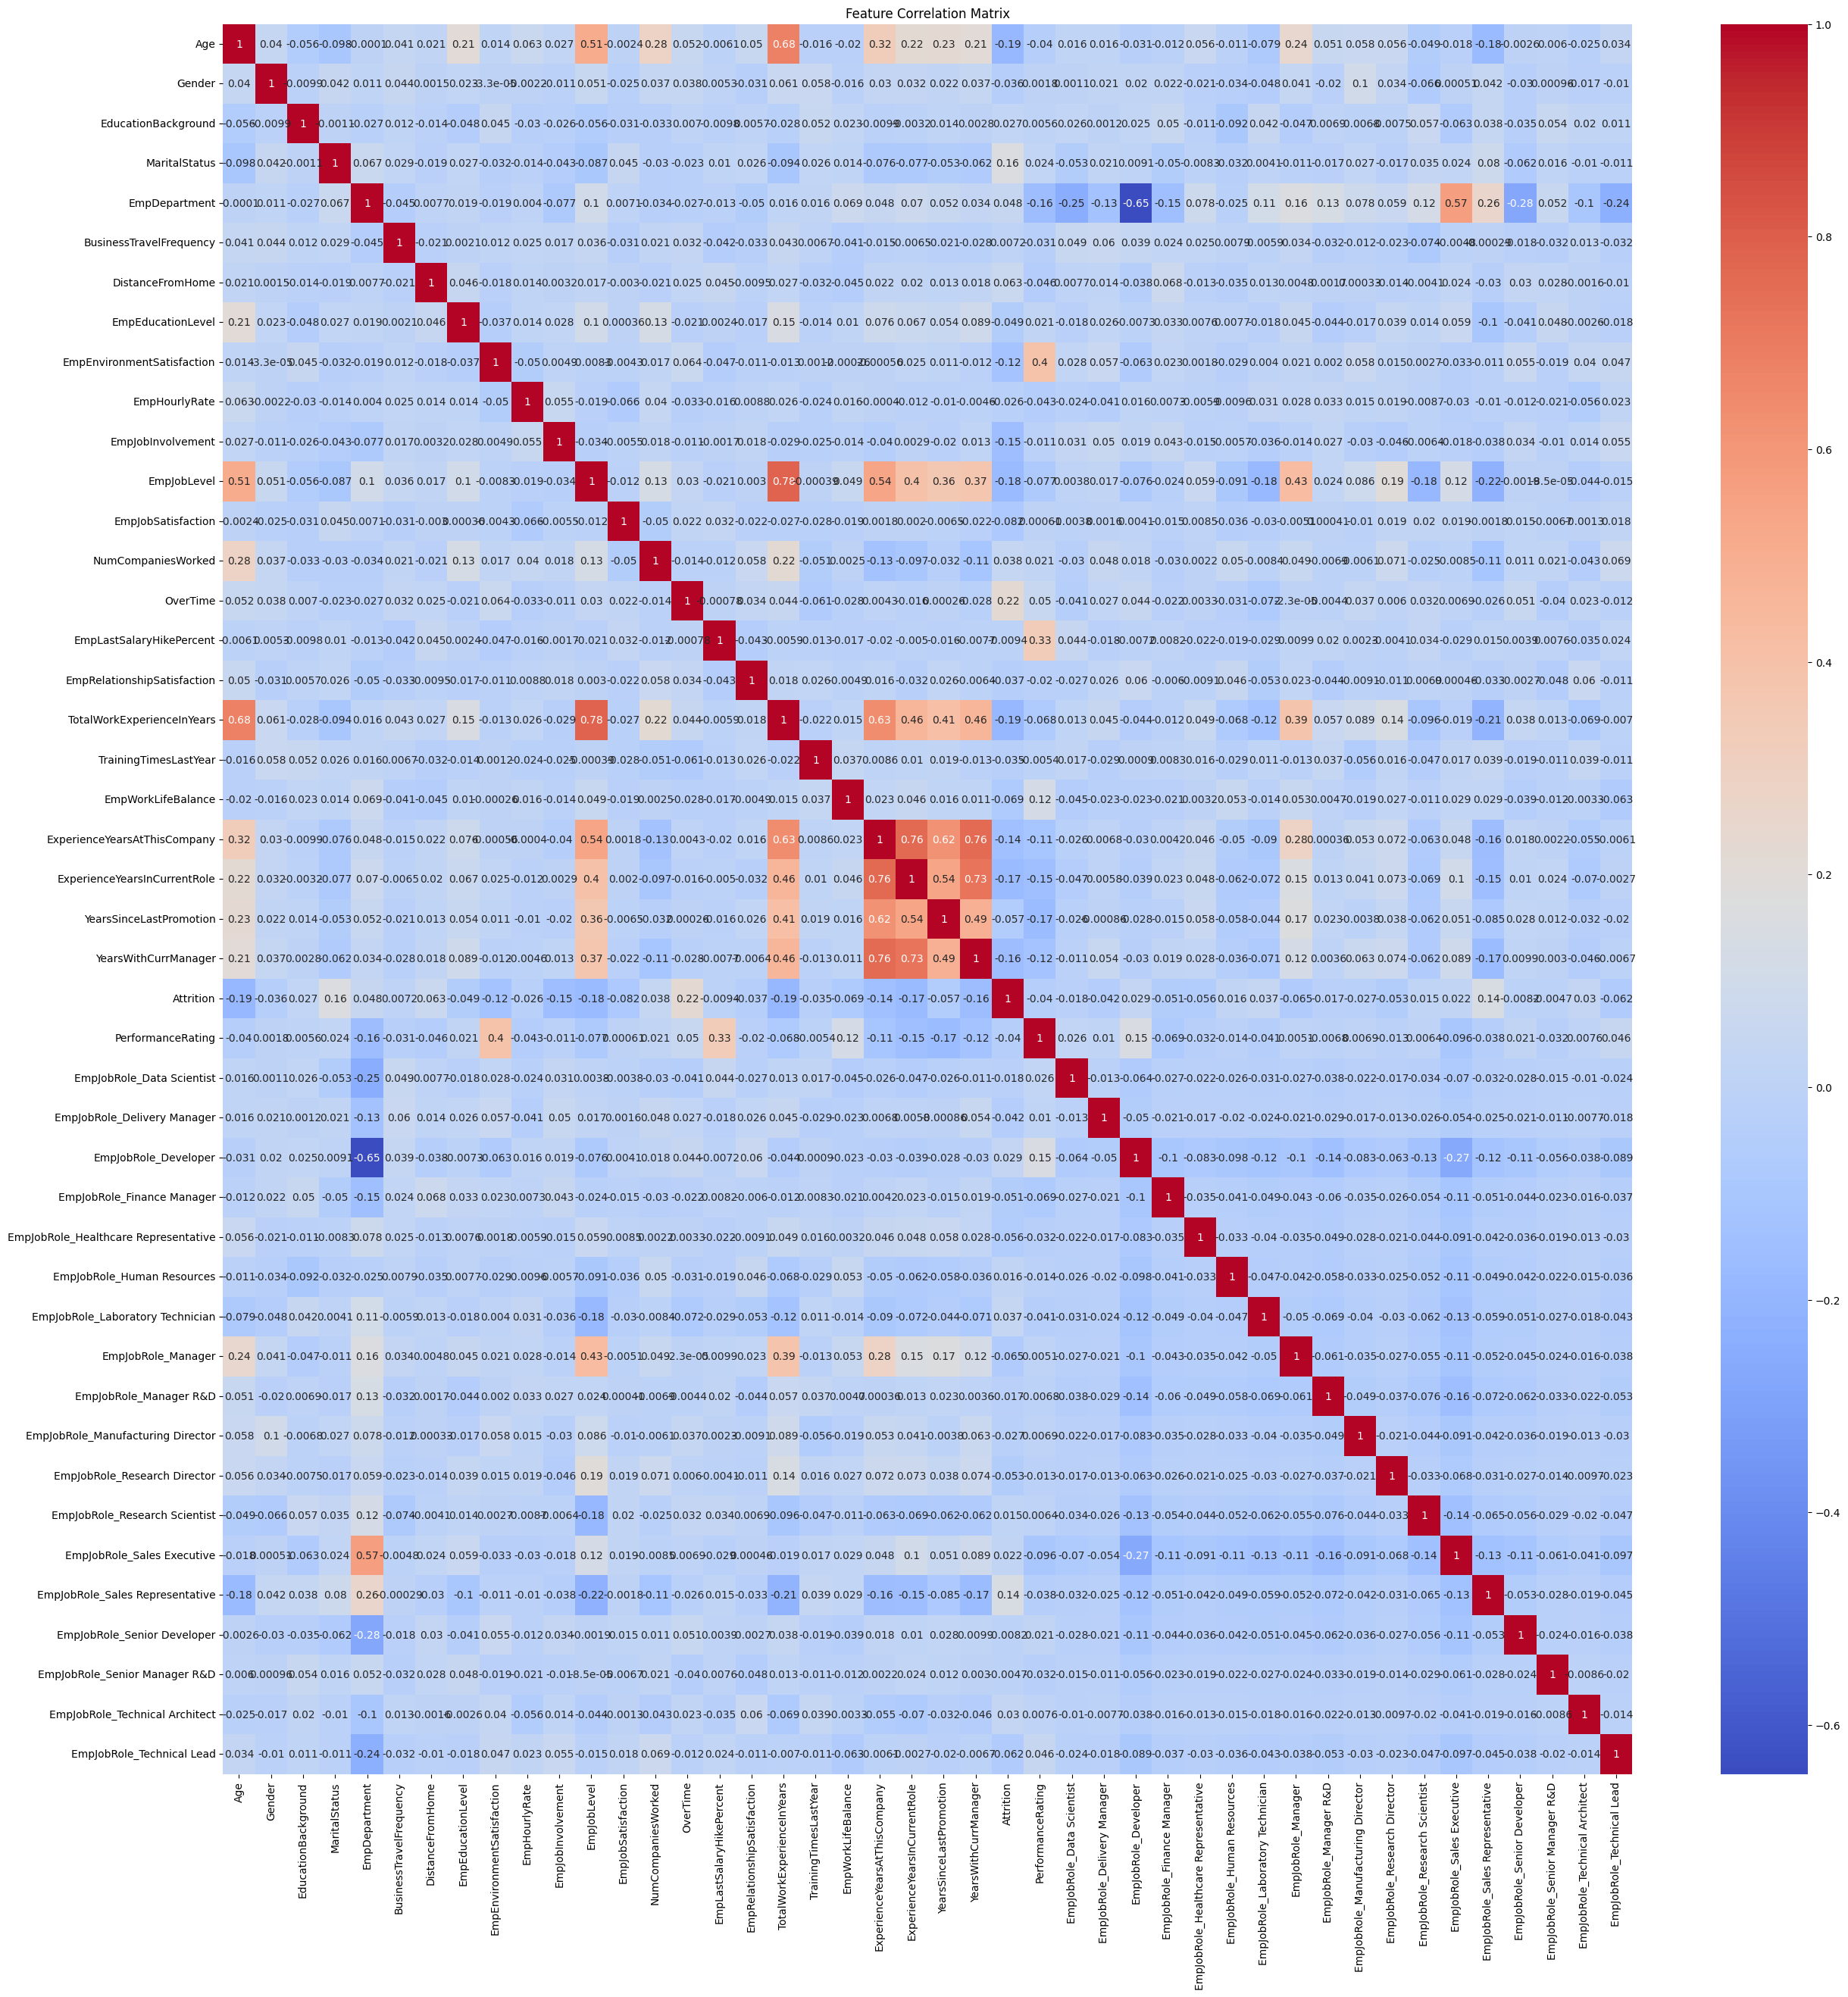

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [31]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = data.corr()

# Get correlation of all features with the target column 'PerformanceRating'
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)

# Display the top positively and negatively correlated features
print("🔹 Features with Highest Correlation to PerformanceRating:\n", target_corr)


🔹 Features with Highest Correlation to PerformanceRating:
 PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395561
EmpLastSalaryHikePercent                0.333722
EmpJobRole_Developer                    0.150348
EmpWorkLifeBalance                      0.124429
OverTime                                0.050206
EmpJobRole_Technical Lead               0.045541
EmpJobRole_Data Scientist               0.025520
MaritalStatus                           0.024172
EmpJobRole_Senior Developer             0.021202
NumCompaniesWorked                      0.020980
EmpEducationLevel                       0.020529
EmpJobRole_Delivery Manager             0.010012
EmpJobRole_Technical Architect          0.007631
EmpJobRole_Manufacturing Director       0.006927
EmpJobRole_Research Scientist           0.006415
EducationBackground                     0.005607
EmpJobRole_Manager                      0.005058
Gender                                  0.001780
EmpJobSati

In [32]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



##############################
# STEP 0: Outlier Detection which was already done
##############################

# For multivariate outlier detection, we use Mahalanobis Distance.
# Here, we select the numerical columns for this calculation.
#below are the columns which are selected for the outlier detection,based on the correlation matrix and market analysis.
numeric_cols = [
    'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpHourlyRate','EmpJobRole_Developer',
    'EmpWorkLifeBalance', 'OverTime', 'EmpJobRole_Technical Lead'
]

# Calculate the mean vector and covariance matrix (for selected numeric features)
mean_vector = data[numeric_cols].mean().values
cov_matrix = np.cov(data[numeric_cols].values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Function to compute Mahalanobis distance for each row
def mahalanobis_distance(row):
    diff = row[numeric_cols].values - mean_vector
    return mahalanobis(row[numeric_cols].values, mean_vector, inv_cov_matrix)

# Compute distances
data['Mahalanobis_Dist'] = data.apply(mahalanobis_distance, axis=1)

# Determine threshold based on chi-square distribution (degrees of freedom = number of numeric_cols)
# For a significance level (e.g., 0.99), points with distance^2 greater than chi2.ppf(0.99, df)
threshold = np.sqrt(chi2.ppf(0.99, df=len(numeric_cols)))
print("Mahalanobis Distance Threshold:", threshold)

# Flag outliers: rows with Mahalanobis distance greater than threshold
data['Outlier_Flag'] = data['Mahalanobis_Dist'] > threshold

# Optional: Review the number and sample of flagged outliers
print("Total Outliers Flagged:", data['Outlier_Flag'].sum())
print("Sample Outlier Rows:\n", data[data['Outlier_Flag']].head())

# Decision Point: Remove outliers or keep them?
# I have set data_clean = data to keep all rows.
data_with_outliers = data.copy()
# Uncomment the following line if you decide to remove the outliers.
data_without_outliers = data[~data['Outlier_Flag']].copy()


##############################
# STEP 1: Correlation Analysis with the Target
##############################
# We want to know which features are most correlated with our target column: PerformanceRating.

# Calculate correlation on the cleaned dataset (or on data if outliers are kept)
correlation_matrix = data_with_outliers.corr()
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)
print("\nCorrelation of Features with PerformanceRating:\n", target_corr)

# Optionally, select features with absolute correlation above a threshold (e.g., 0.3)
abs_corr = correlation_matrix["PerformanceRating"].abs()
selected_features = abs_corr[abs_corr > 0.3].index.tolist()
if "PerformanceRating" in selected_features:
    selected_features.remove("PerformanceRating")
print("\nSelected features (|corr| > 0.3):", selected_features)

#note Mahalanobis Distance is not considered in the selected features as it is used for outlier detection. and it is computationally expensive.



Mahalanobis Distance Threshold: 5.398262474229351
Total Outliers Flagged: 82
Sample Outlier Rows:
      Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
11    47       1                    3              0              5   
25    52       0                    2              1              5   
52    47       1                    4              1              1   
72    51       1                    2              1              5   
100   50       0                    1              0              1   

     BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
11                         1                 3                  3   
25                         2                 3                  4   
52                         2                 2                  2   
72                         2                26                  4   
100                        0                 2                  4   

     EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
11  

In [33]:
# Calculate correlation on the cleaned dataset (or on data if outliers are kept)
correlation_matrix = data_without_outliers.corr()
target_corr = correlation_matrix["PerformanceRating"].sort_values(ascending=False)
print("\nCorrelation of Features with PerformanceRating:\n", target_corr)

# Optionally, select features with absolute correlation above a threshold (e.g., 0.3)
abs_corr = correlation_matrix["PerformanceRating"].abs()
selected_features = abs_corr[abs_corr > 0.3].index.tolist()
if "PerformanceRating" in selected_features:
    selected_features.remove("PerformanceRating")
print("\nSelected features (|corr| > 0.3):", selected_features)



Correlation of Features with PerformanceRating:
 PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395173
EmpLastSalaryHikePercent                0.346046
EmpJobRole_Developer                    0.158130
EmpWorkLifeBalance                      0.141066
OverTime                                0.051684
EmpJobRole_Data Scientist               0.027688
NumCompaniesWorked                      0.025179
EmpJobRole_Senior Developer             0.023805
EmpEducationLevel                       0.023763
MaritalStatus                           0.020791
EducationBackground                     0.014027
EmpJobRole_Delivery Manager             0.010854
EmpJobRole_Technical Architect          0.008643
EmpJobRole_Manufacturing Director       0.008325
Mahalanobis_Dist                        0.006065
Gender                                  0.003404
EmpJobRole_Research Scientist           0.001941
EmpJobRole_Manager                      0.001348
EmpJobSatisfaction 

I removed outliers only for columns where the numeric nature implies a wide range and where extreme values could skew model performance or indicate data issues. For other columns (categorical, binary, or ordinal with limited unique values), the concept of an “outlier” is either not applicable or requires a different treatment that respects the variable’s inherent properties.

In [34]:
for column in data_without_outliers.columns:
    unique_values = data_without_outliers[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'Age': [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 33 25 45 23 52
 26 54 37 24 49 55 43 22 31 58 20 21 48 19 18 59 46 51 57]
Unique values in column 'Gender': [0 1]
Unique values in column 'EducationBackground': [2 1 0 3 4 5]
Unique values in column 'MaritalStatus': [2 1 0]
Unique values in column 'EmpDepartment': [5 3 1 0 4 2]
Unique values in column 'BusinessTravelFrequency': [2 1 0]
Unique values in column 'DistanceFromHome': [10 14  5 16  8  1 24 27 19  3  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values in column 'EmpEducationLevel': [3 4 2 5 1]
Unique values in column 'EmpEnvironmentSatisfaction': [4 2 1 3]
Unique values in column 'EmpHourlyRate': [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36  69
  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78  74  91
  33  62  87  68  34  70 100  92  39  97  47  90  85  30  

In [35]:
data_clean=data_without_outliers

Identified Continuous Columns for Normality Checks: ['Mahalanobis_Dist']

Column: Mahalanobis_Dist
Shapiro-Wilk test p-value: 0.0000


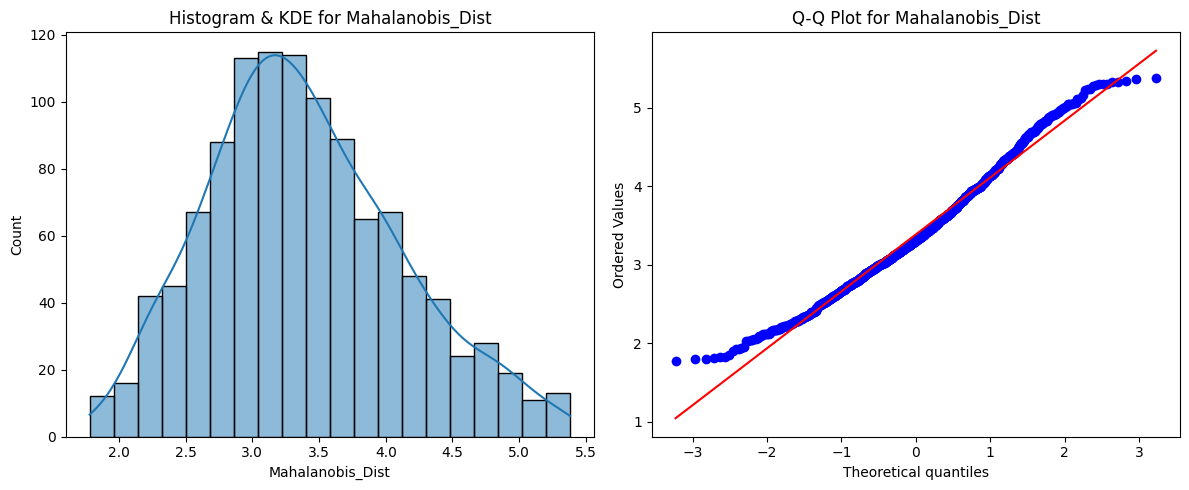


Checking Skewness and Applying Transformations:

Mahalanobis_Dist - Original Skewness: 0.3881
Mahalanobis_Dist does not require transformation (skewness within acceptable limits).


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer


# Step 1: Identify Continuous Columns
# We'll define continuous columns as those numeric columns with more than a threshold number of unique values.
def is_continuous(col, threshold=10):
    # Check if the column is numeric and has more than 'threshold' unique values.
    return data_clean[col].dtype in [np.int64, np.float64] and data_clean[col].nunique() > threshold

# Build a list of continuous columns
continuous_columns = [col for col in data_clean.columns if is_continuous(col)]
print("Identified Continuous Columns for Normality Checks:", continuous_columns)

# Step 2: Normality Checks on Each Continuous Column
normality_results = {}
for col in continuous_columns:
    # Perform Shapiro-Wilk test (note: best for sample sizes n < 5000)
    stat, p_value = stats.shapiro(data_clean[col])
    normality_results[col] = p_value
    print(f"\nColumn: {col}")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    
    # Plot Histogram with KDE and Q-Q plot
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean[col], kde=True, bins=20)
    plt.title(f"Histogram & KDE for {col}")
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    
    plt.tight_layout()
    plt.show()

# Step 3: Assess Skewness and Apply Transformations if Needed
# We will use the Yeo-Johnson transformation, which can handle zero and negative values.
pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = data_clean.copy()  # Copy data_clean to apply transformations

print("\nChecking Skewness and Applying Transformations:")
for col in continuous_columns:
    skewness = data_clean[col].skew()
    print(f"\n{col} - Original Skewness: {skewness:.4f}")
    
    # If the distribution is skewed (abs(skewness) > 0.5), apply transformation
    if abs(skewness) > 0.5:
        # Yeo-Johnson transformation requires a 2D array (hence [[col]])
        transformed_col = pt.fit_transform(data_clean[[col]])
        transformed_data[col] = transformed_col.ravel()  # flatten the result to a 1D array
        
        # Check new skewness after transformation
        new_skewness = transformed_data[col].skew()
        print(f"After transformation, {col} - New Skewness: {new_skewness:.4f}")
        
        # Plot the transformed distribution
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(transformed_data[col], kde=True, bins=20)
        plt.title(f"Histogram & KDE for Transformed {col}")
        
        plt.subplot(1, 2, 2)
        stats.probplot(transformed_data[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for Transformed {col}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} does not require transformation (skewness within acceptable limits).")

Continuous Columns Selected for Normality Checks: ['Age', 'EmpHourlyRate', 'DistanceFromHome', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Column: Age
Shapiro-Wilk test p-value: 0.0000


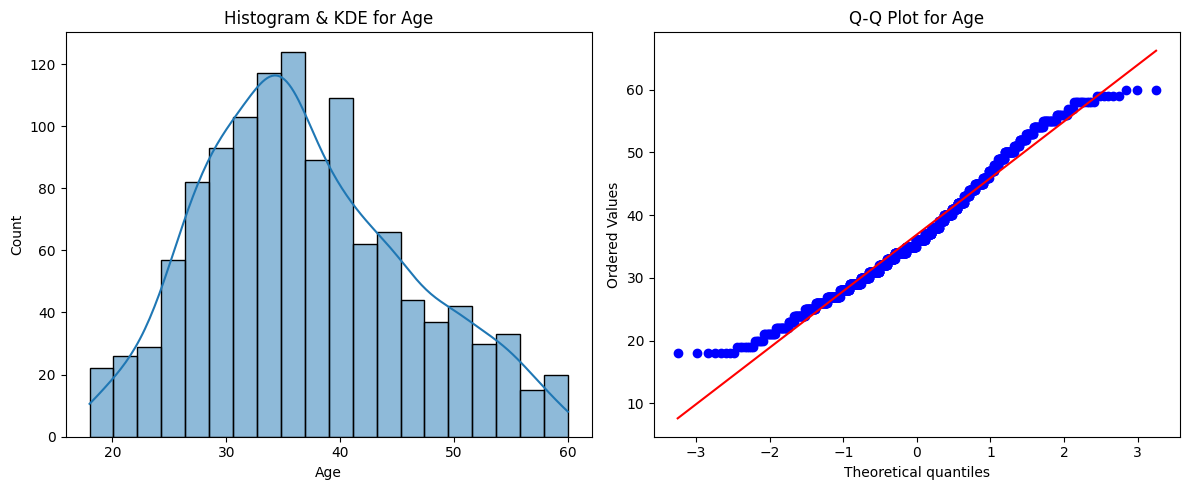


Column: EmpHourlyRate
Shapiro-Wilk test p-value: 0.0000


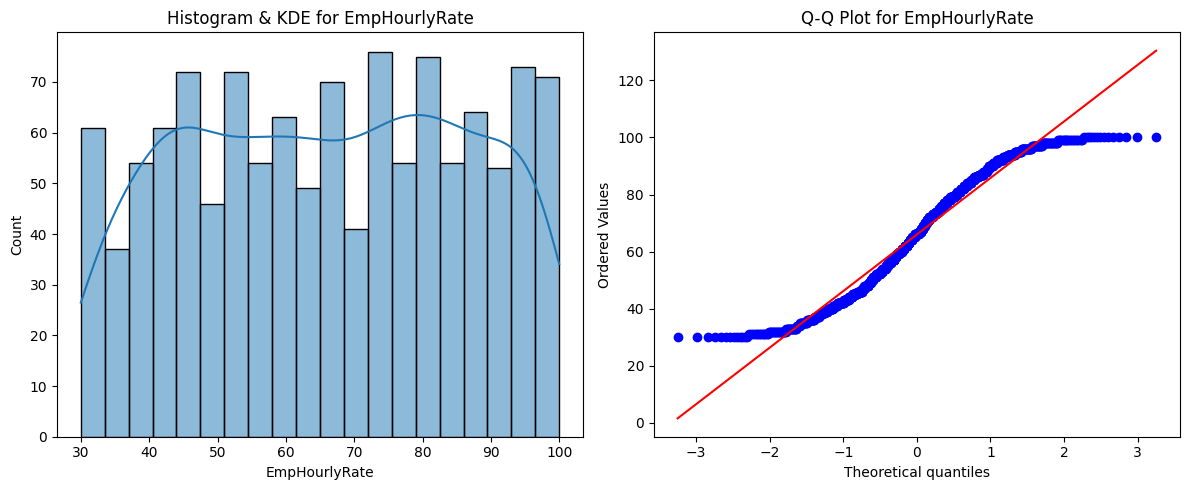


Column: DistanceFromHome
Shapiro-Wilk test p-value: 0.0000


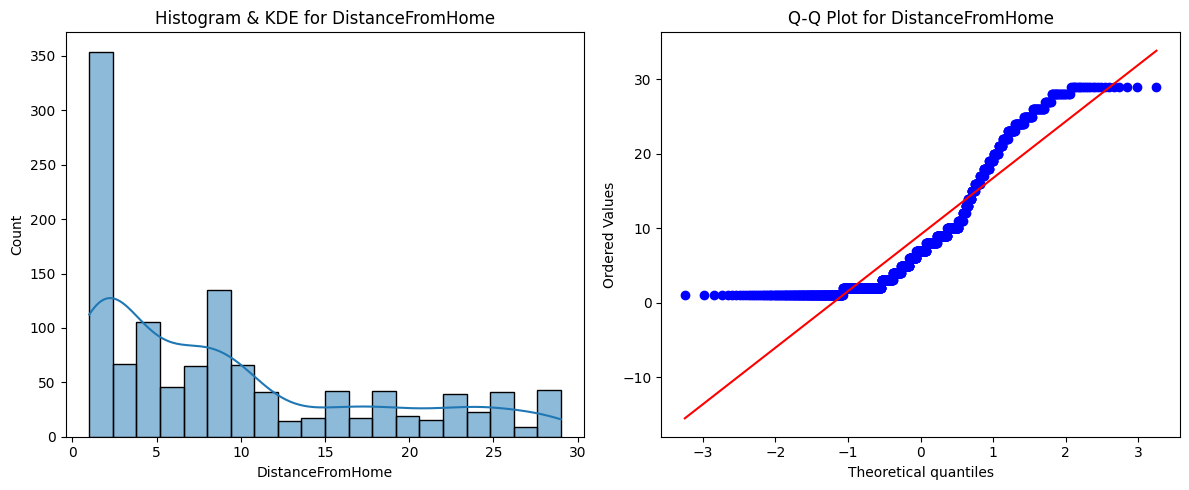


Column: TotalWorkExperienceInYears
Shapiro-Wilk test p-value: 0.0000


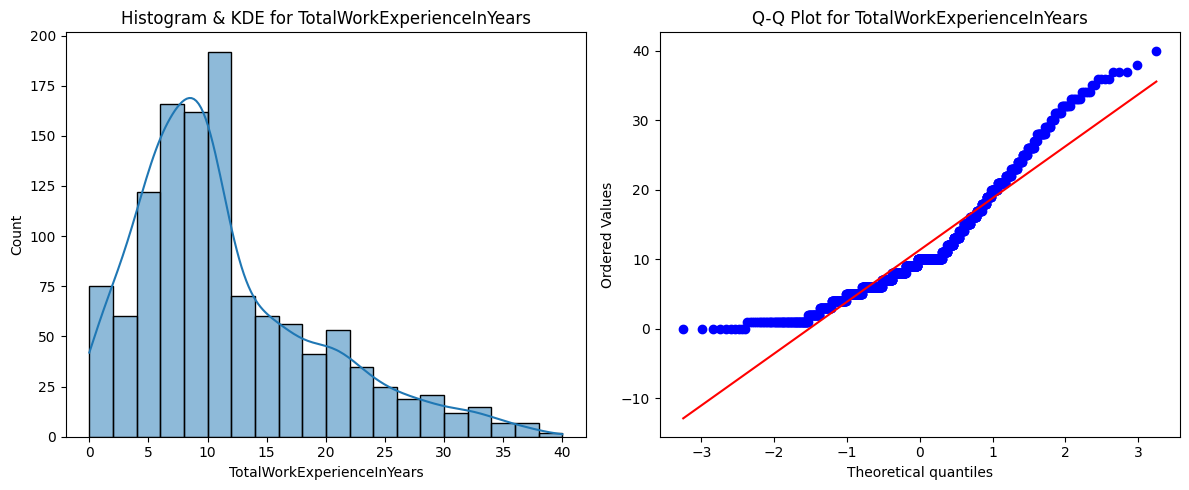


Column: ExperienceYearsAtThisCompany
Shapiro-Wilk test p-value: 0.0000


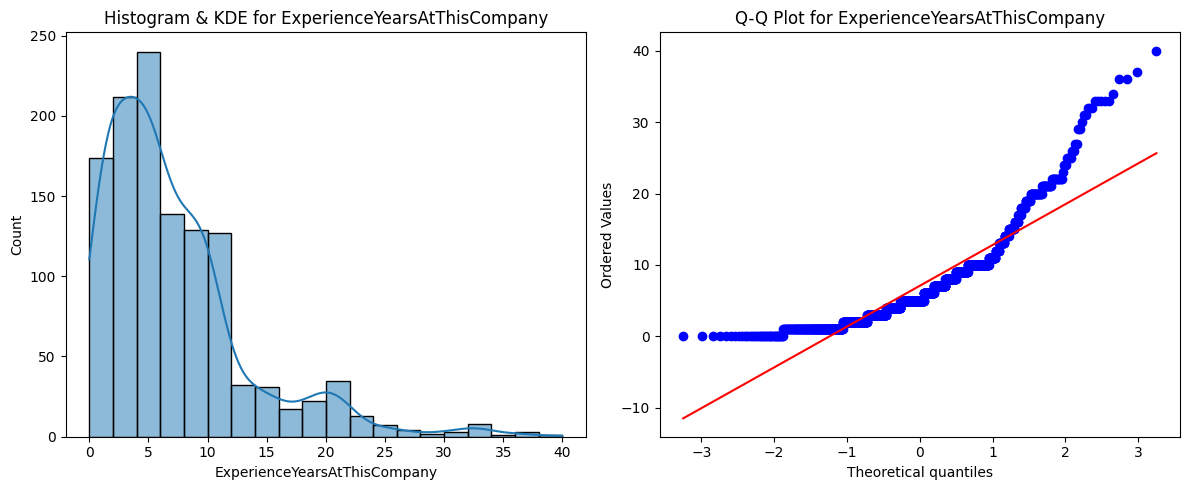


Column: ExperienceYearsInCurrentRole
Shapiro-Wilk test p-value: 0.0000


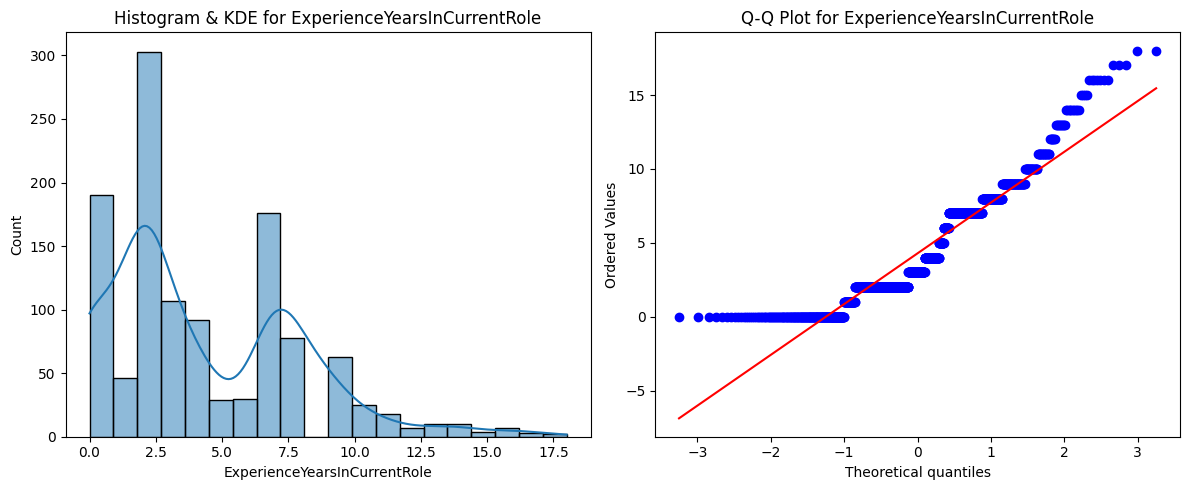


Column: YearsSinceLastPromotion
Shapiro-Wilk test p-value: 0.0000


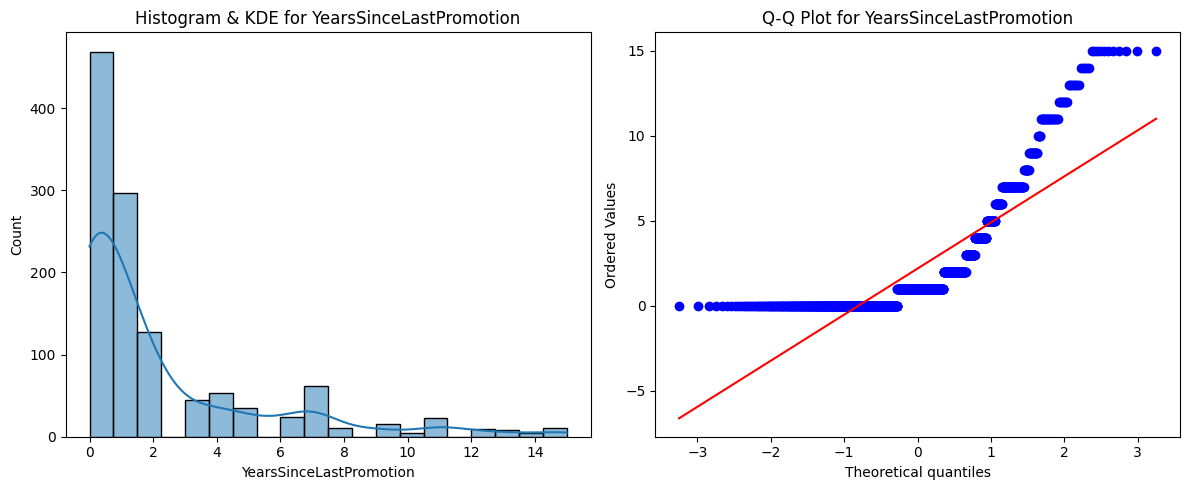


Column: YearsWithCurrManager
Shapiro-Wilk test p-value: 0.0000


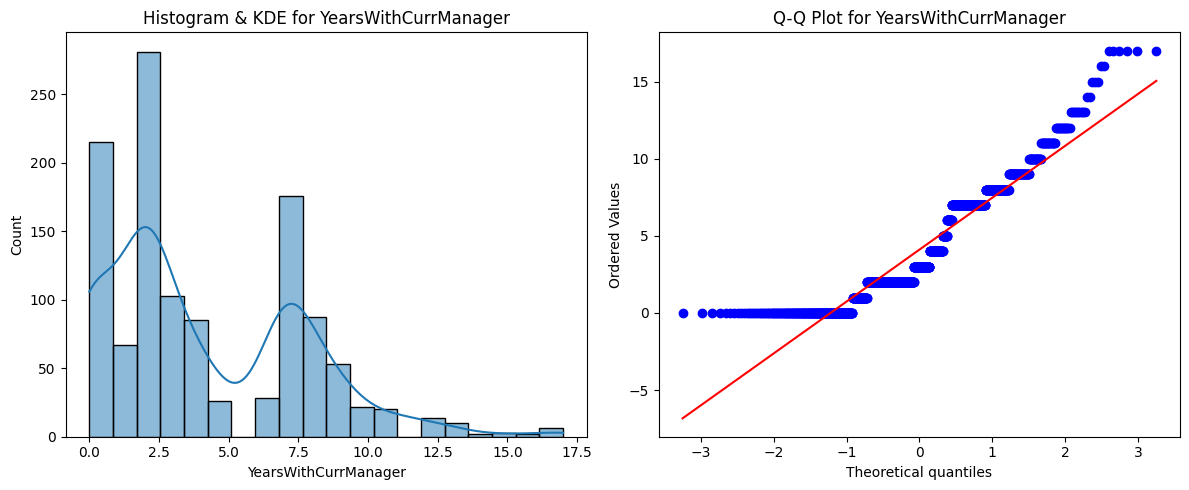


Assessing Skewness and Applying Transformations (if needed):

Age - Original Skewness: 0.3841
Age does not require transformation (skewness within acceptable limits).

EmpHourlyRate - Original Skewness: -0.0352
EmpHourlyRate does not require transformation (skewness within acceptable limits).

DistanceFromHome - Original Skewness: 0.9630
After Yeo-Johnson transformation, DistanceFromHome - New Skewness: -0.0005


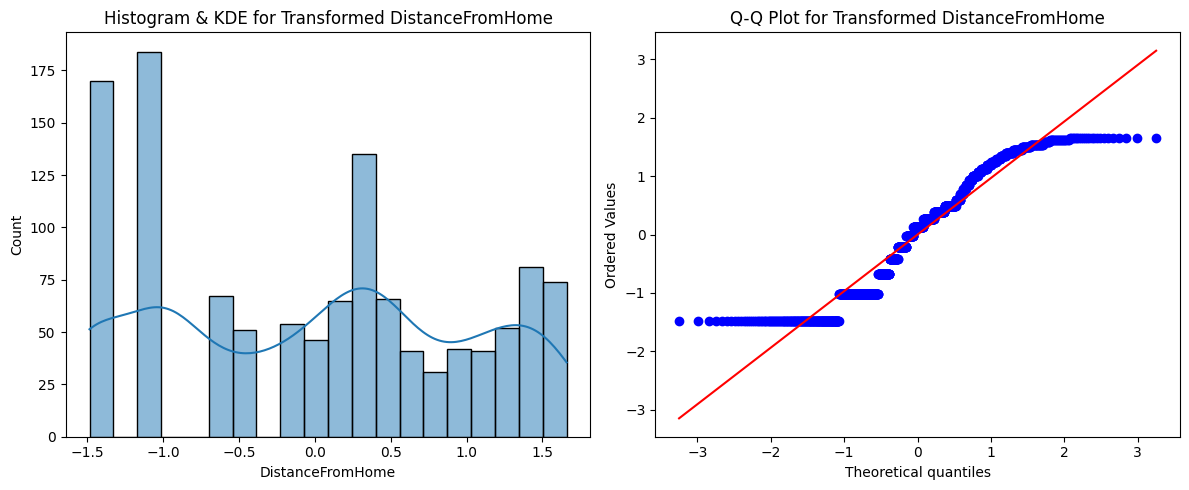


TotalWorkExperienceInYears - Original Skewness: 1.0869
After Yeo-Johnson transformation, TotalWorkExperienceInYears - New Skewness: -0.0127


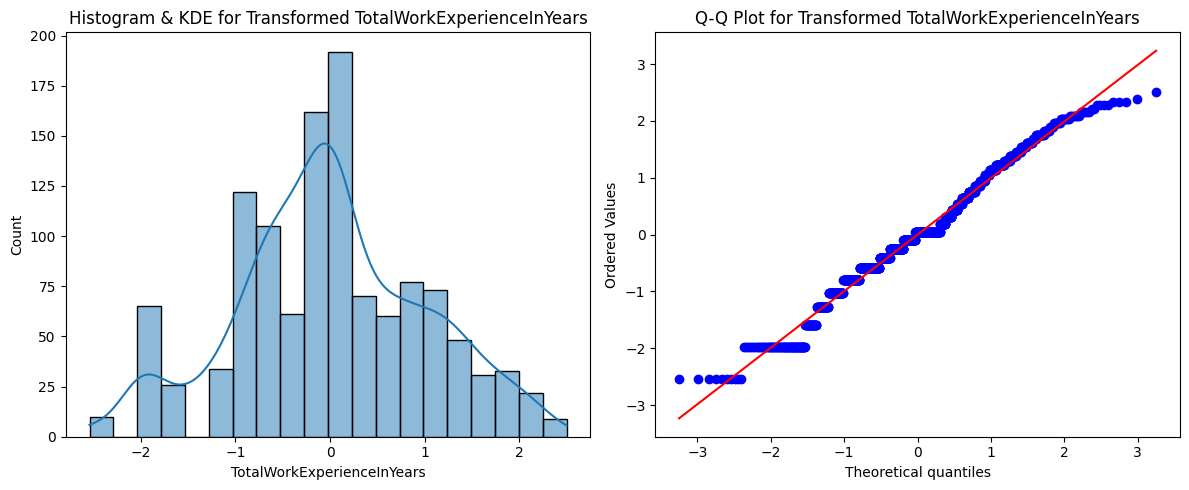


ExperienceYearsAtThisCompany - Original Skewness: 1.7891
After Yeo-Johnson transformation, ExperienceYearsAtThisCompany - New Skewness: -0.0085


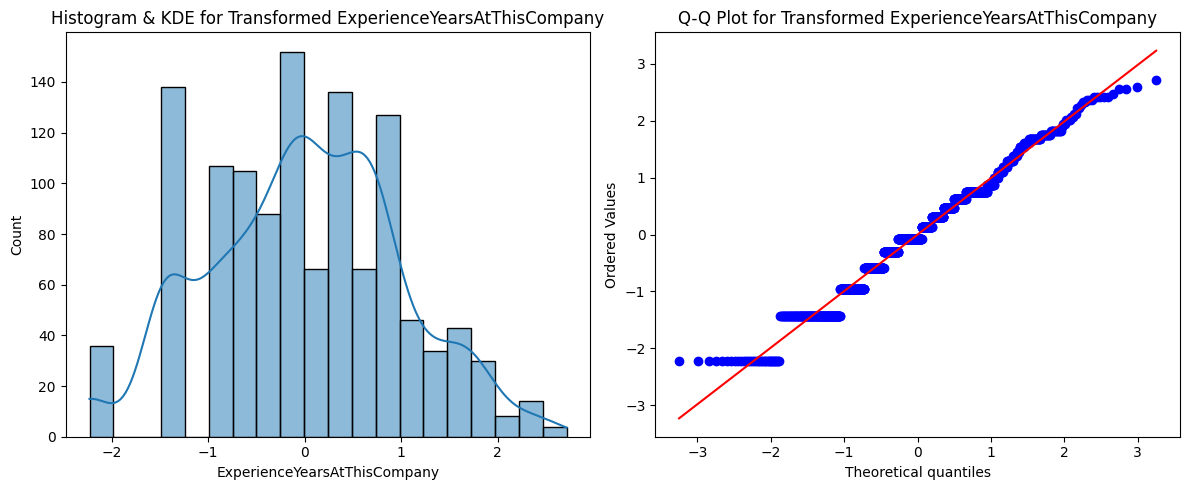


ExperienceYearsInCurrentRole - Original Skewness: 0.8882
After Yeo-Johnson transformation, ExperienceYearsInCurrentRole - New Skewness: -0.0638


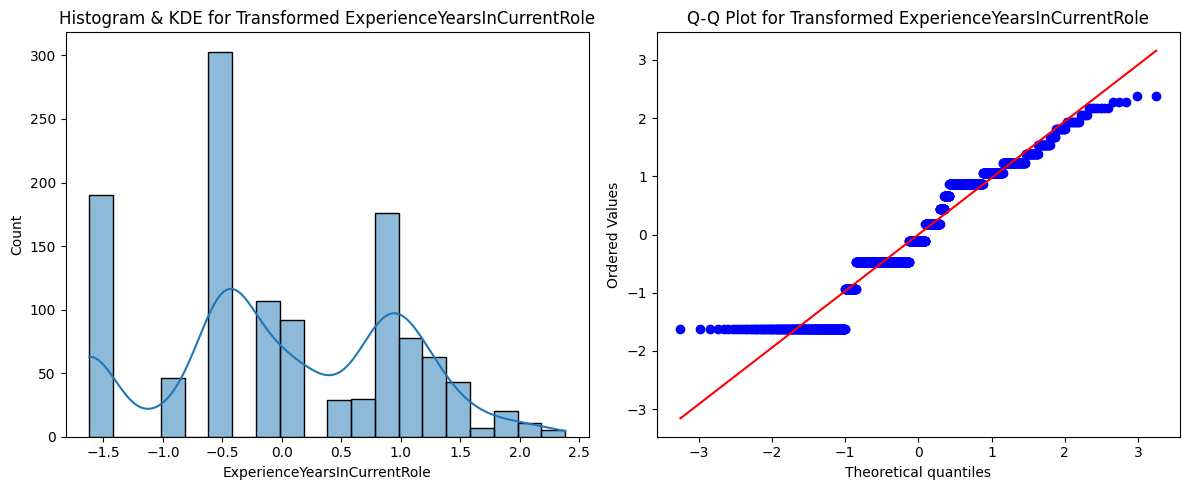


YearsSinceLastPromotion - Original Skewness: 1.9749
After Yeo-Johnson transformation, YearsSinceLastPromotion - New Skewness: 0.2079


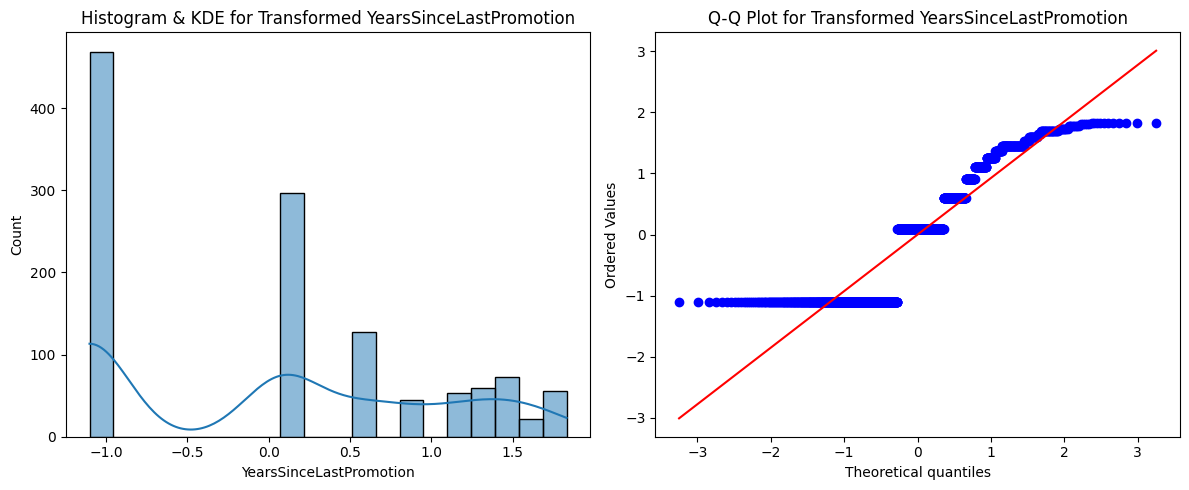


YearsWithCurrManager - Original Skewness: 0.8132
After Yeo-Johnson transformation, YearsWithCurrManager - New Skewness: -0.0702


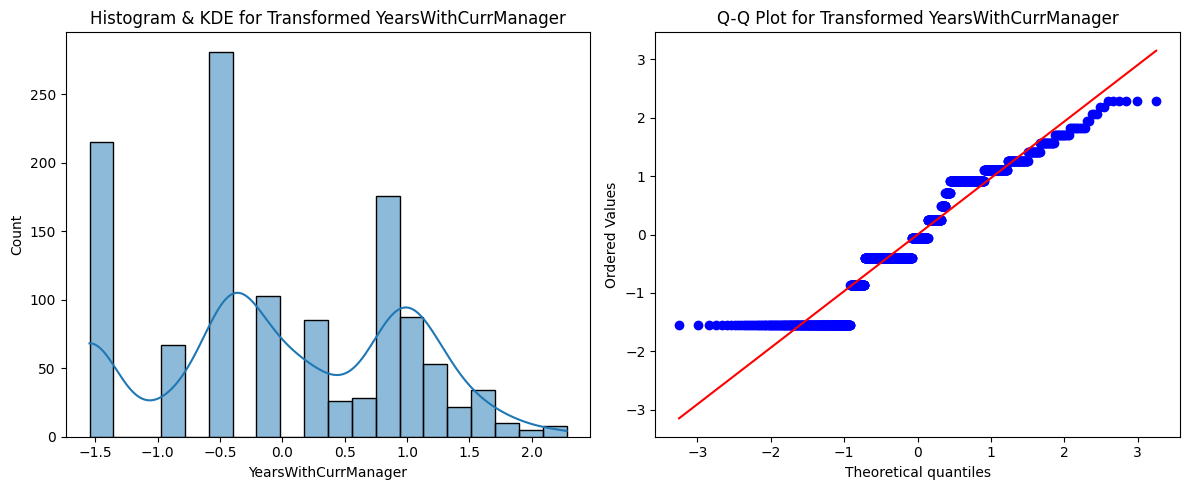

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

# --- Step 1: Specify the Continuous Columns for Normality Checks ---
# Manually specify those columns that you consider truly continuous.
# (Adjust this list based on your domain knowledge.)
continuous_columns = [
    'Age', 
    'EmpHourlyRate', 
    'DistanceFromHome', 
    'TotalWorkExperienceInYears', 
    'ExperienceYearsAtThisCompany', 
    'ExperienceYearsInCurrentRole', 
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

print("Continuous Columns Selected for Normality Checks:", continuous_columns)

# --- Step 2: Perform Normality Checks on Each Continuous Column ---
normality_results = {}
for col in continuous_columns:
    # Shapiro-Wilk test (best for sample sizes n < 5000)
    stat, p_value = stats.shapiro(data[col])
    normality_results[col] = p_value
    print(f"\nColumn: {col}")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    
    # Plot Histogram with KDE and Q-Q Plot
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Histogram & KDE for {col}")
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    
    plt.tight_layout()
    plt.show()

# --- Step 3: Check Skewness and Apply Transformation if Needed ---
# We use the Yeo-Johnson transformation since it can handle zero and negative values.
pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = data.copy()  # We'll store the transformed values here.

print("\nAssessing Skewness and Applying Transformations (if needed):")
for col in continuous_columns:
    original_skew = data[col].skew()
    print(f"\n{col} - Original Skewness: {original_skew:.4f}")
    
    # If the absolute skewness is above a threshold (e.g., 0.5), consider transformation.
    if abs(original_skew) > 0.5:
        # PowerTransformer expects a 2D array.
        transformed_col = pt.fit_transform(data[[col]])
        transformed_data[col] = transformed_col.ravel()  # Convert back to 1D array
        
        new_skew = transformed_data[col].skew()
        print(f"After Yeo-Johnson transformation, {col} - New Skewness: {new_skew:.4f}")
        
        # Plot the transformed distribution.
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(transformed_data[col], kde=True, bins=20)
        plt.title(f"Histogram & KDE for Transformed {col}")
        
        plt.subplot(1, 2, 2)
        stats.probplot(transformed_data[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for Transformed {col}")
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} does not require transformation (skewness within acceptable limits).")


Discrete Variables:
We usually do not perform standard normality tests on discrete/ordinal variables because they have limited unique values and are inherently non-normal.

Continuous Variables Results:
Although the Shapiro–Wilk test rejected normality (p=0.0000) for all continuous columns—likely due to large sample size—the skewness values and visual inspections suggest that some variables (e.g., Age, EmpHourlyRate) are approximately symmetric and do not require transformation. Others with skewness above 0.5 (e.g., DistanceFromHome, TotalWorkExperienceInYears, etc.) benefit from a Yeo–Johnson transformation.

Continuous Columns Selected for Normality Checks: ['Age', 'EmpHourlyRate', 'DistanceFromHome', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Column: Age
Shapiro-Wilk test p-value: 0.0000


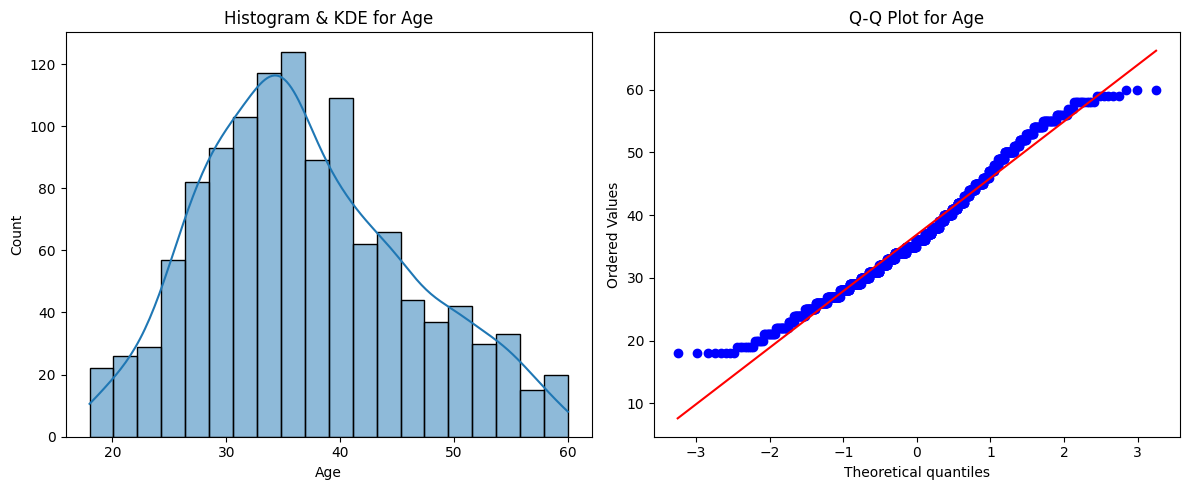


Column: EmpHourlyRate
Shapiro-Wilk test p-value: 0.0000


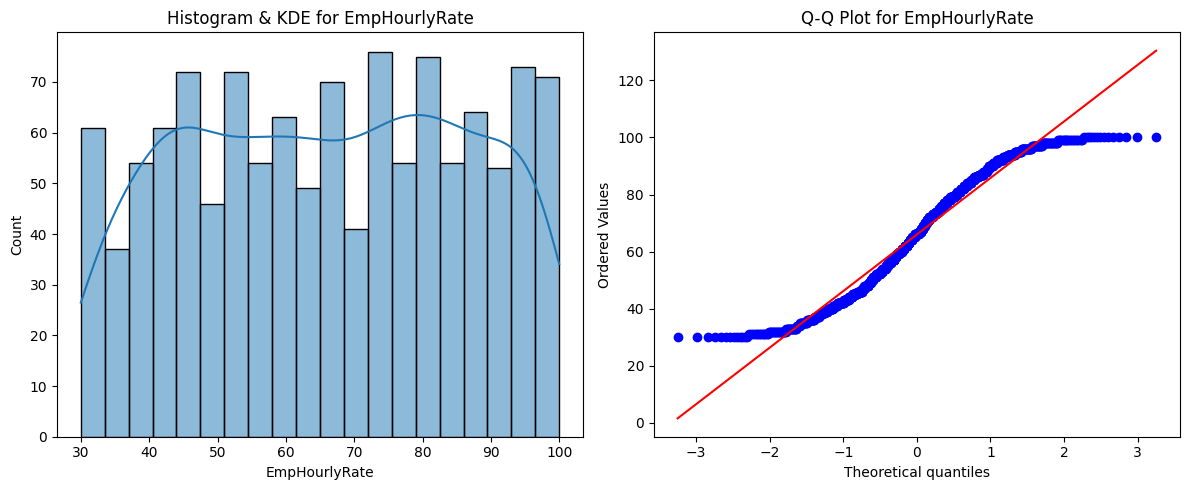


Column: DistanceFromHome
Shapiro-Wilk test p-value: 0.0000


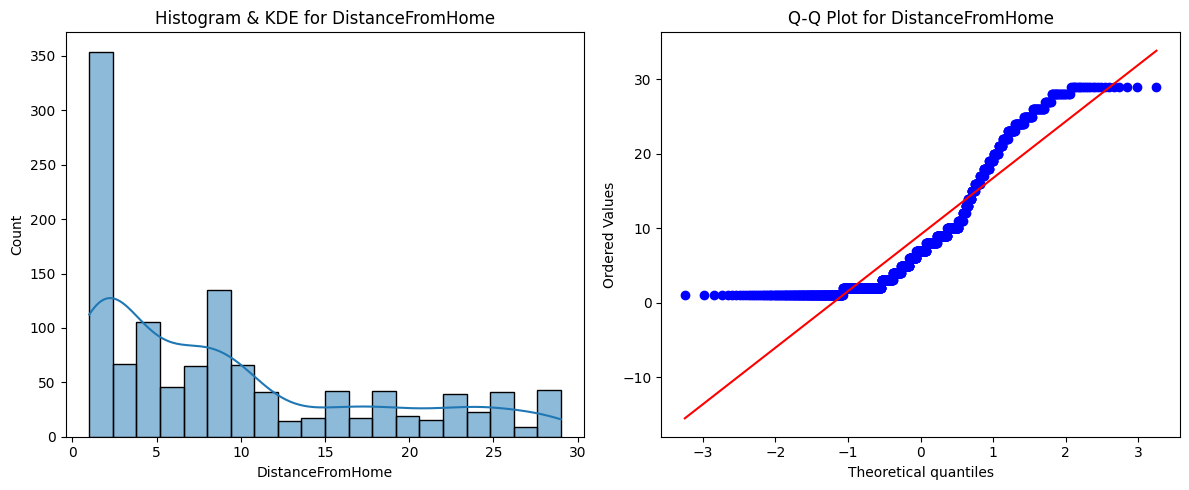


Column: TotalWorkExperienceInYears
Shapiro-Wilk test p-value: 0.0000


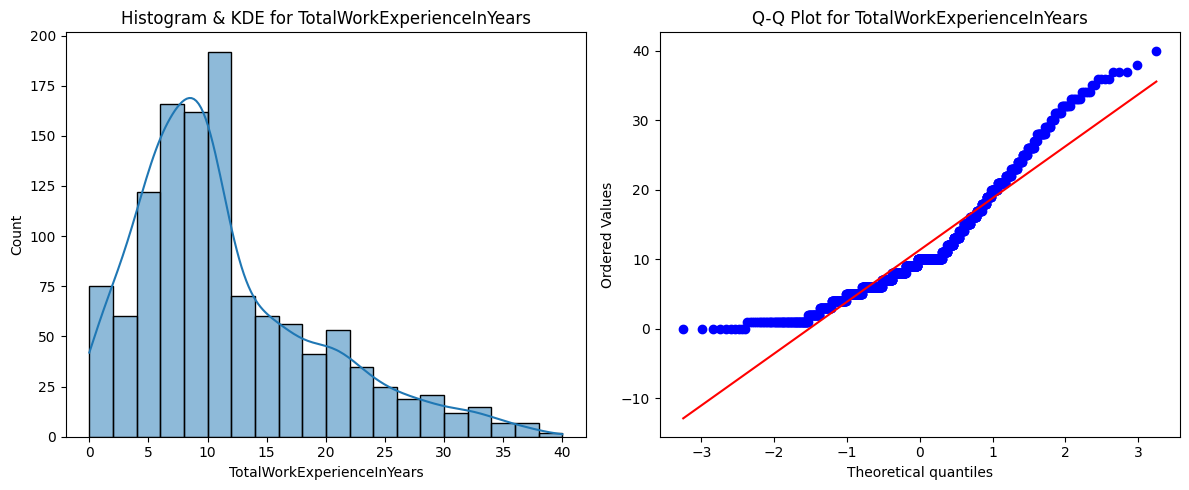


Column: ExperienceYearsAtThisCompany
Shapiro-Wilk test p-value: 0.0000


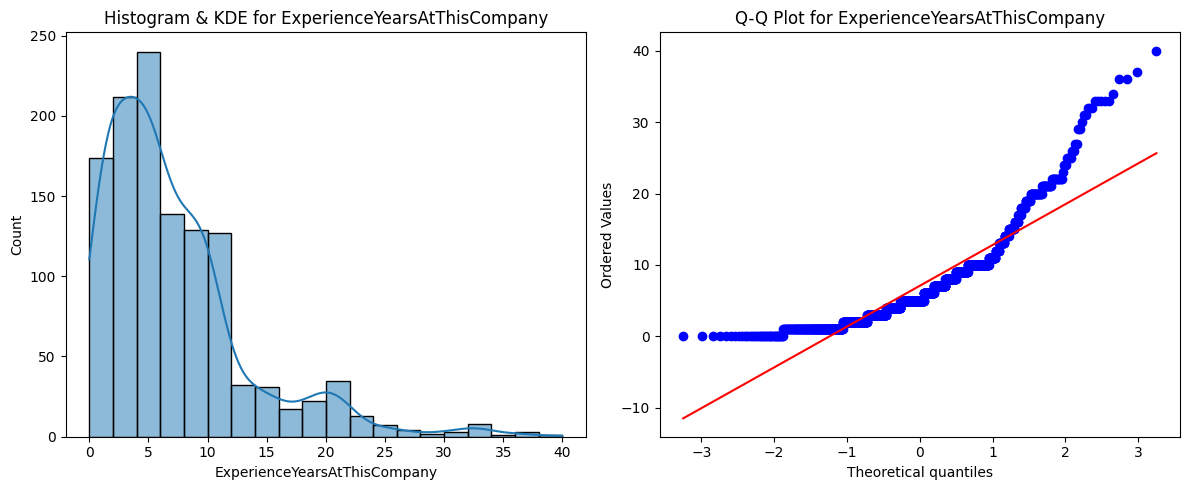


Column: ExperienceYearsInCurrentRole
Shapiro-Wilk test p-value: 0.0000


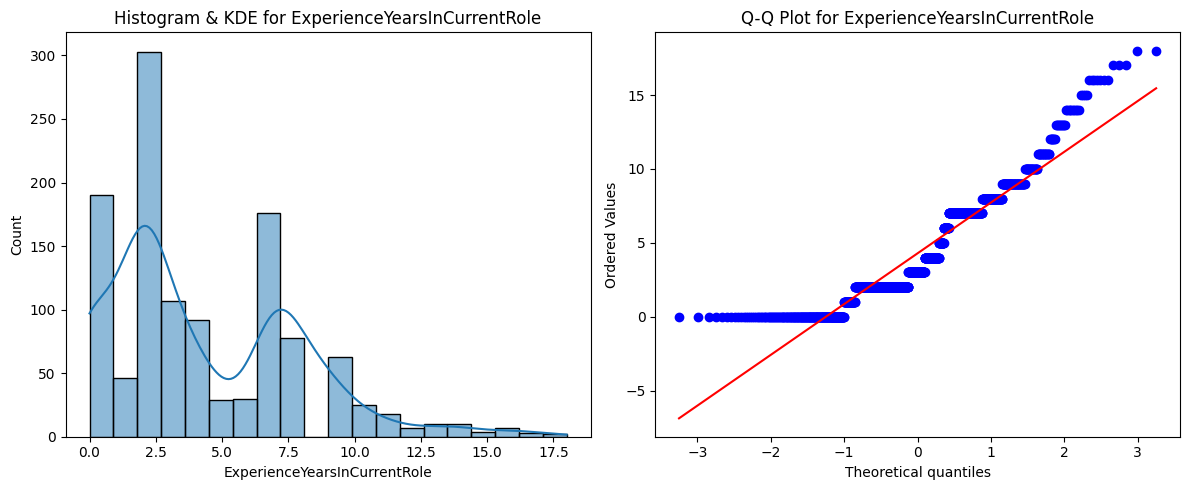


Column: YearsSinceLastPromotion
Shapiro-Wilk test p-value: 0.0000


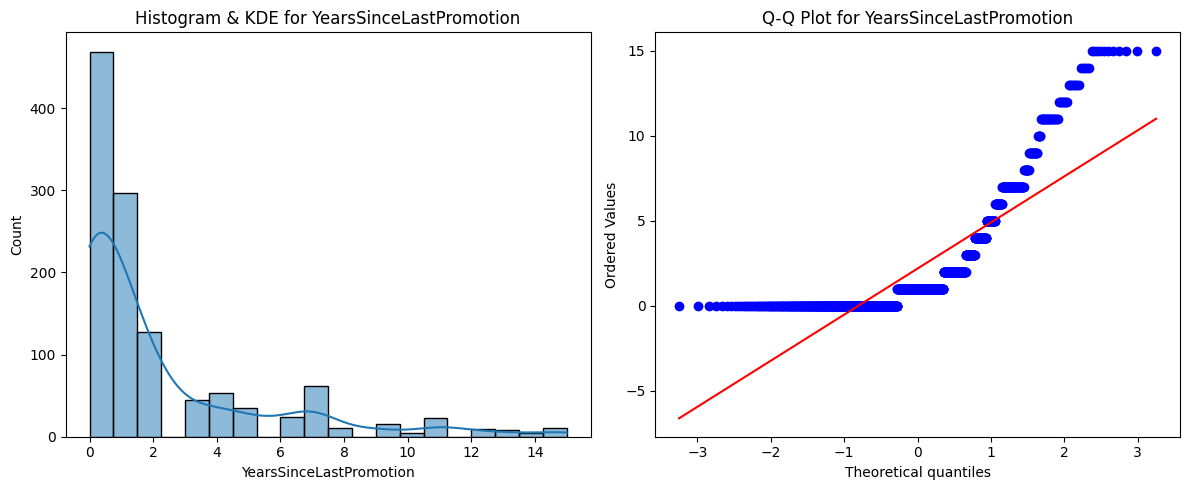


Column: YearsWithCurrManager
Shapiro-Wilk test p-value: 0.0000


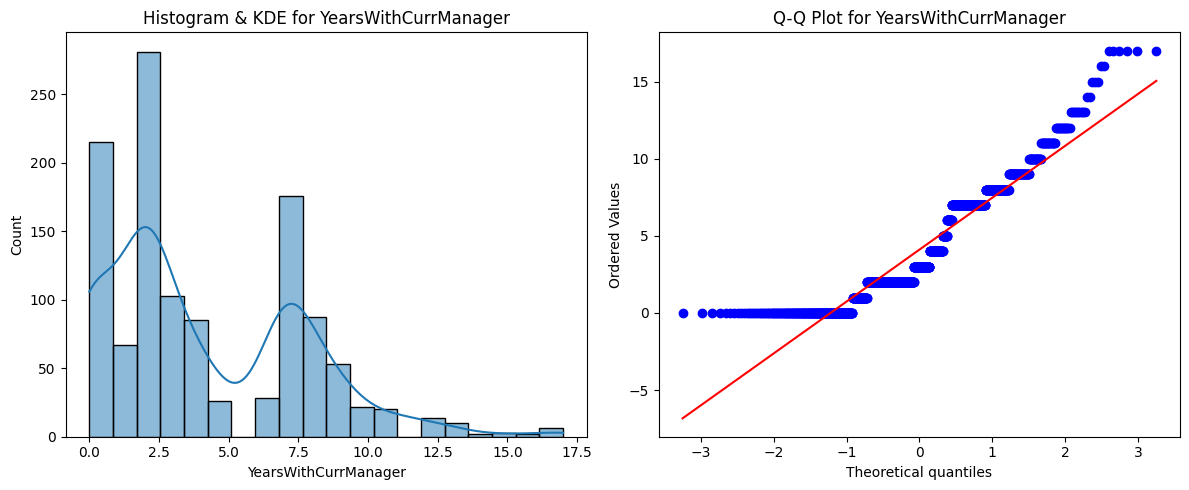


Assessing Skewness and Applying Transformations (if needed):

Age - Original Skewness: 0.3841
Age does not require transformation (skewness within acceptable limits).

EmpHourlyRate - Original Skewness: -0.0352
EmpHourlyRate does not require transformation (skewness within acceptable limits).

DistanceFromHome - Original Skewness: 0.9630
After Yeo-Johnson transformation, DistanceFromHome - New Skewness: -0.0005


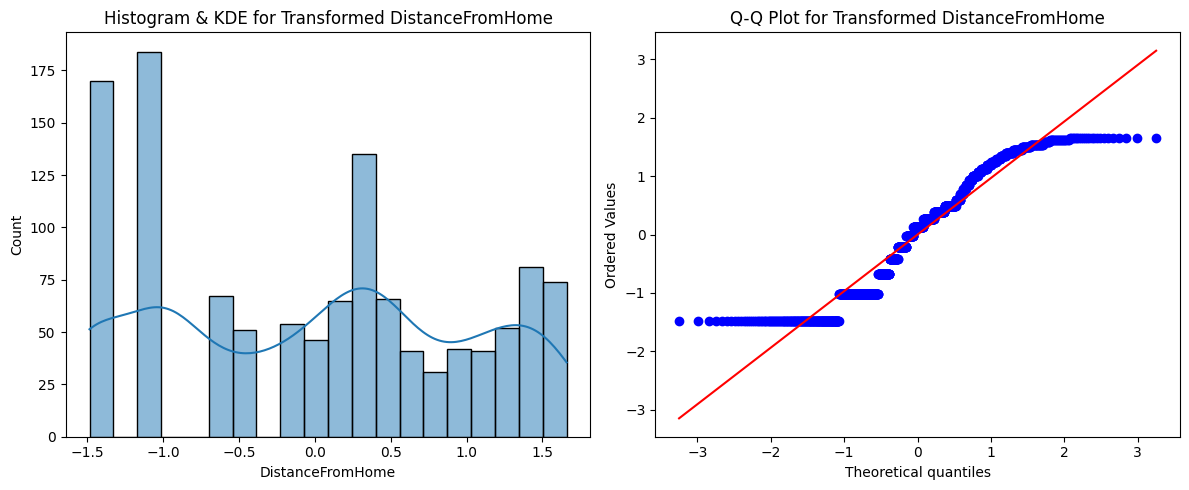


TotalWorkExperienceInYears - Original Skewness: 1.0869
After Yeo-Johnson transformation, TotalWorkExperienceInYears - New Skewness: -0.0127


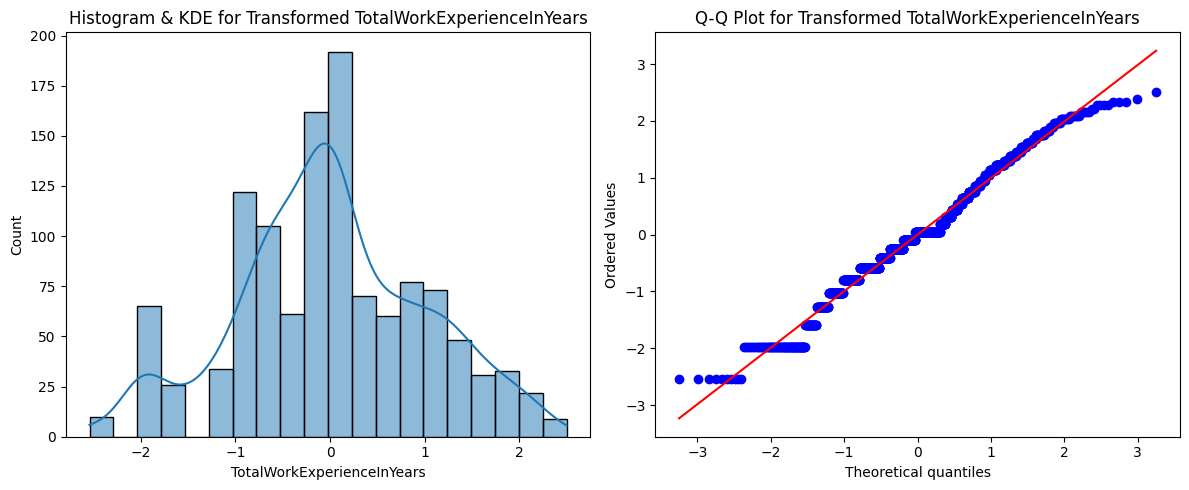


ExperienceYearsAtThisCompany - Original Skewness: 1.7891
After Yeo-Johnson transformation, ExperienceYearsAtThisCompany - New Skewness: -0.0085


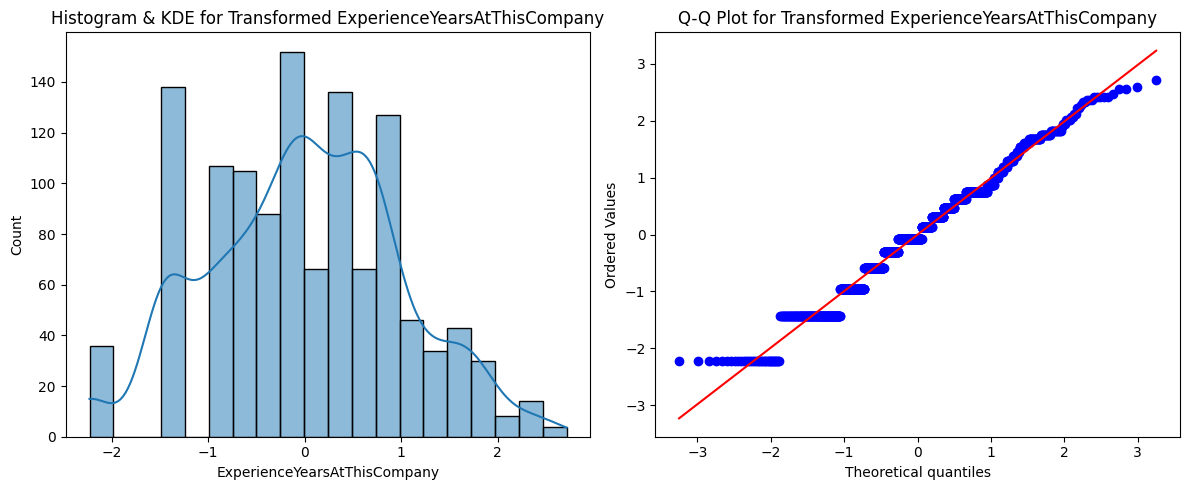


ExperienceYearsInCurrentRole - Original Skewness: 0.8882
After Yeo-Johnson transformation, ExperienceYearsInCurrentRole - New Skewness: -0.0638


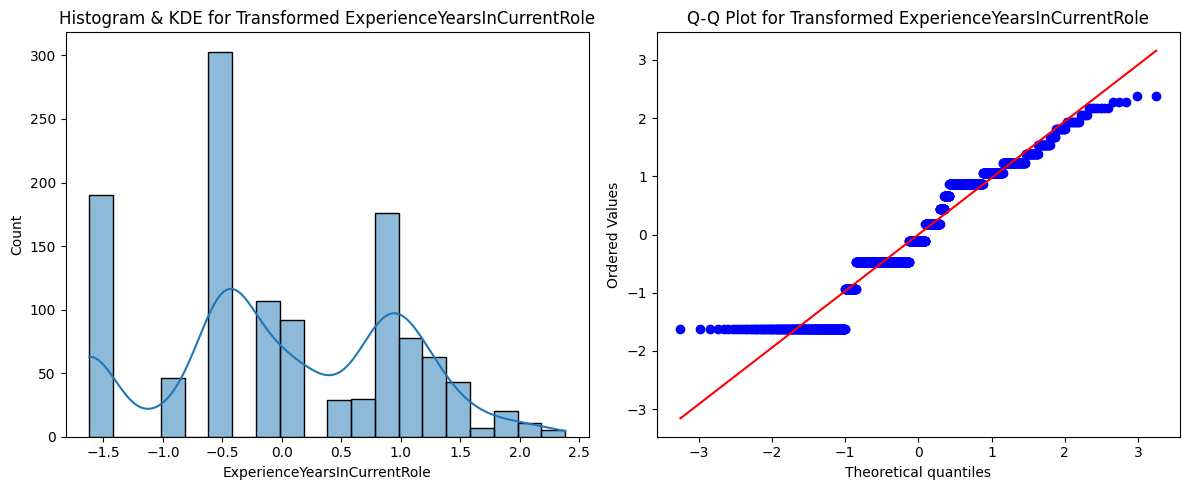


YearsSinceLastPromotion - Original Skewness: 1.9749
After Yeo-Johnson transformation, YearsSinceLastPromotion - New Skewness: 0.2079


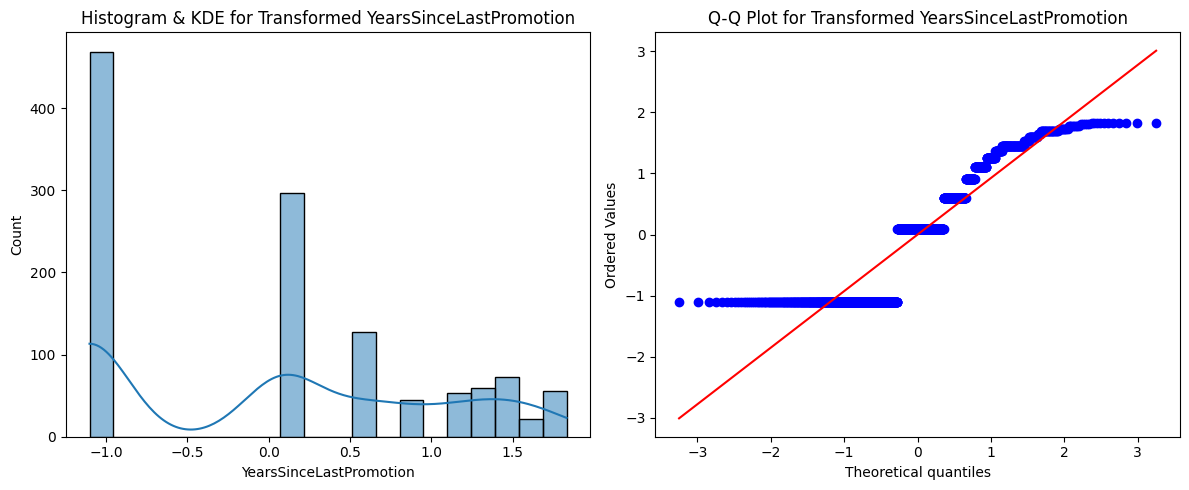


YearsWithCurrManager - Original Skewness: 0.8132
After Yeo-Johnson transformation, YearsWithCurrManager - New Skewness: -0.0702


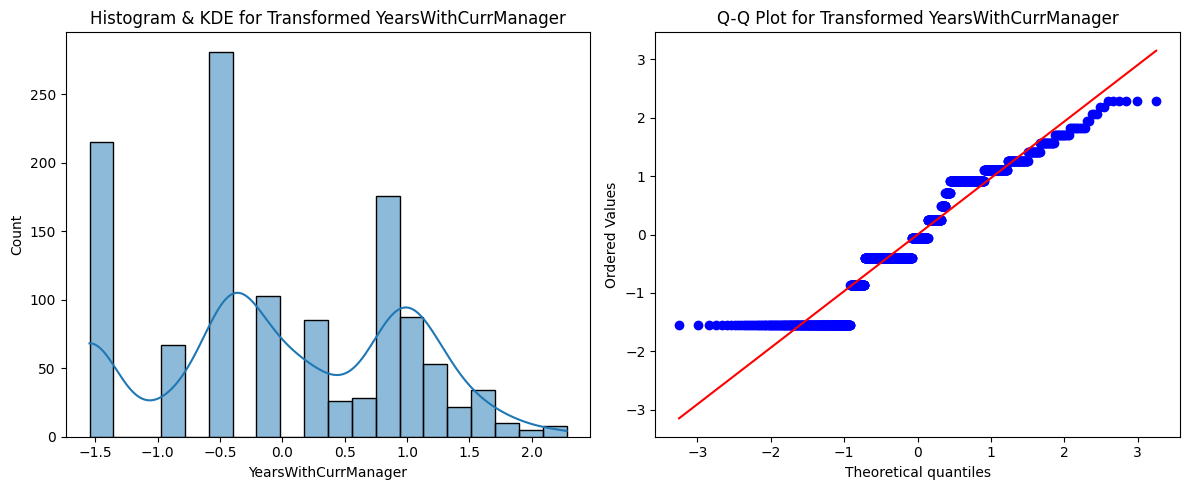


Head of the transformed data:
   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0   32       0                    2              2              5   
1   47       0                    2              2              5   
2   40       0                    1              1              5   
3   41       0                    0              0              3   
4   60       0                    2              2              5   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2          0.492926                  3   
1                        2          0.853336                  4   
2                        1         -0.210938                  4   
3                        2          0.492926                  4   
4                        2          0.998827                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                           4             55  ...   
1                           4             42 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

# --- Step 1: Specify the Continuous Columns for Normality Checks ---
# Manually specify those columns that you consider truly continuous.
continuous_columns = [
    'Age', 
    'EmpHourlyRate', 
    'DistanceFromHome', 
    'TotalWorkExperienceInYears', 
    'ExperienceYearsAtThisCompany', 
    'ExperienceYearsInCurrentRole', 
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

print("Continuous Columns Selected for Normality Checks:", continuous_columns)

# --- Step 2: Perform Normality Checks on Each Continuous Column ---
normality_results = {}
for col in continuous_columns:
    # Shapiro-Wilk test (best for sample sizes n < 5000)
    stat, p_value = stats.shapiro(data[col])
    normality_results[col] = p_value
    print(f"\nColumn: {col}")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    
    # Plot Histogram with KDE and Q-Q Plot
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Histogram & KDE for {col}")
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    
    plt.tight_layout()
    plt.show()

# --- Step 3: Check Skewness and Apply Transformation if Needed ---
# We use the Yeo-Johnson transformation since it can handle zero and negative values.
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Create a copy of data for transformation
data_transformed = data.copy()

print("\nAssessing Skewness and Applying Transformations (if needed):")
for col in continuous_columns:
    original_skew = data[col].skew()
    print(f"\n{col} - Original Skewness: {original_skew:.4f}")
    
    # If the absolute skewness is above a threshold (e.g., 0.5), consider transformation.
    if abs(original_skew) > 0.5:
        # PowerTransformer expects a 2D array.
        transformed_col = pt.fit_transform(data[[col]])
        # Update the column in data_transformed (convert to 1D using ravel)
        data_transformed[col] = transformed_col.ravel()  
        
        new_skew = data_transformed[col].skew()
        print(f"After Yeo-Johnson transformation, {col} - New Skewness: {new_skew:.4f}")
        
        # Plot the transformed distribution.
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(data_transformed[col], kde=True, bins=20)
        plt.title(f"Histogram & KDE for Transformed {col}")
        
        plt.subplot(1, 2, 2)
        stats.probplot(data_transformed[col], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for Transformed {col}")
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} does not require transformation (skewness within acceptable limits).")

# --- Final Step: Update the Original Data Variable ---
# Now, the transformed data is stored in data_transformed. 
# Assign it back to data if you wish to use the variable 'data' for further analysis.
data = data_transformed.copy()

# Optional: Check the head of the transformed DataFrame
print("\nHead of the transformed data:")
print(data.head())


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the list of numeric columns you wish to scale/normalize and later use for feature selection.
numeric_cols = [
    'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'EmpEnvironmentSatisfaction',
    'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'EmpHourlyRate', 'EmpJobRole_Developer', 'EmpWorkLifeBalance', 'OverTime',
    'EmpJobRole_Technical Lead'
]

# Separate features (X) and target (y) using data_clean
X = data_clean.drop(columns=['PerformanceRating'])
y = data_clean['PerformanceRating']

# For the purpose of scaling and feature engineering, we isolate our numeric features.
# (Other features, like one-hot encoded categorical ones, can be left as-is or scaled separately.)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
        # You can add additional transformers here for other groups of columns if needed.
    ],
    remainder='passthrough'  # Leaves the rest of the columns unchanged.
)

# --- Step 1: Scaling/Normalization ---
# In this pipeline step, StandardScaler is applied to our numeric columns.
# This ensures that each feature contributes equally to distance-based methods and models that assume standard scaling.
scaling_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Step 2: Feature Selection ---
# We use SelectKBest with f_classif to pick the top k features based on their relationship with PerformanceRating.
# Since PerformanceRating is categorical (e.g., 2, 3, 4), using an ANOVA F-test is appropriate.
feature_selection = SelectKBest(score_func=f_classif, k=10)  # k can be tuned based on cross-validation

# --- Step 3: Feature Engineering ---
# As an example, we use PolynomialFeatures to create interaction and higher-order terms.
# This can help capture non-linear relationships among features.
feature_engineering = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

# --- Build the Overall Pipeline ---
# We combine scaling, feature selection, and feature engineering in one pipeline.
# Note: Order matters – feature engineering (like polynomial expansion) is applied after scaling.
pipeline = Pipeline([
    ('scaling', scaling_pipeline),        # Step 1: Scale numeric features
    ('feature_selection', feature_selection),  # Step 2: Select best features
    ('feature_engineering', feature_engineering),  # Step 3: Generate polynomial features
    # The final estimator will be one of our models.
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and test sets using data_clean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training & Evaluation ---
# We can try several models. Below, we show how to train and evaluate the pipeline using a RandomForest.
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("RandomForest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- Trying Different Models ---
# You can iterate over different classifiers by setting up a parameter grid and using GridSearchCV, for example:
param_grid = {
    'classifier': [
        RandomForestClassifier(n_estimators=100, random_state=42),
        LogisticRegression(max_iter=500, random_state=42),
        SVC(probability=True, random_state=42),
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    ]
}

# Set up GridSearchCV to compare different models within the same pipeline structure
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Model:", grid.best_estimator_)
print("Best Accuracy:", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Set Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


RandomForest Classifier Accuracy: 0.9017857142857143
              precision    recall  f1-score   support

           2       0.74      0.86      0.79        36
           3       0.95      0.93      0.94       167
           4       0.88      0.71      0.79        21

    accuracy                           0.90       224
   macro avg       0.86      0.84      0.84       224
weighted avg       0.91      0.90      0.90       224



c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\user\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c

Best Model: Pipeline(steps=[('scaling',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['NumCompaniesWorked',
                                                                    'TotalWorkExperienceInYears',
                                                                    'TrainingTimesLastYear',
                                                                    'ExperienceYearsAtThisCompany',
                                                                    'ExperienceYearsInCurrentRole',
                                                                    'EmpEnvironmentSatisfaction',
                                                                    'EmpLastSalaryHikePercent',

In [40]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0   32       0                    2              2              5   
1   47       0                    2              2              5   
2   40       0                    1              1              5   
3   41       0                    0              0              3   
4   60       0                    2              2              5   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                           4             55  ...   
1                           4             42  ...   
2                           4             48  ...   
3                           2             73  ...   
4                           1             84  ...   

   EmpJobRole_Research Director  EmpJobRole_Research Scientist  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   EmpJobRole_Sales Executive  EmpJobRole_Sales Representative  \
0                           1                                0   
1                           1                                0   
2                           1                                0   
3                           0                                0   
4                           1                                0   

   EmpJobRole_Senior Developer  EmpJobRole_Senior Manager R&D  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   EmpJobRole_Technical Architect  EmpJobRole_Technical Lead  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   Mahalanobis_Dist  Outlier_Flag  
0          2.899968         False  
1          3.275450         False  
2          4.549680         False  
3          4.335864         False  
4          3.366280         False  

[5 rows x 46 columns]

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ===== Preprocessing: Re-map target variable =====
# Our original target values are [2,3,4]. For models like XGBoost, we remap them to [0,1,2].
data_processed = data.copy()  # Work on a copy of your data
data_processed['PerformanceRating'] = data_processed['PerformanceRating'].map({2: 0, 3: 1, 4: 2})

# ===== Prepare Numeric Columns =====
# Define the list of numeric columns for scaling/normalization.
numeric_cols = [
    'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction',
    'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'EmpHourlyRate','EmpJobRole_Developer', 'EmpWorkLifeBalance', 'OverTime',
    'EmpJobRole_Technical Lead'
]

# Remove any column that is constant (only one unique value) because they don’t add any information.
numeric_cols = [col for col in numeric_cols if data_processed[col].nunique() > 1]
print("Final numeric columns for scaling:", numeric_cols)

# ===== Separate Features and Target =====
X = data_processed.drop(columns=['PerformanceRating'])
y = data_processed['PerformanceRating']

# ===== Preprocessing Pipeline for Numeric Columns =====
# We apply StandardScaler to the numeric columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # leave other columns unchanged
)

# ===== Build the Overall Pipeline =====
# We include scaling, feature selection, and polynomial feature expansion.
pipeline = Pipeline([
    ('scaling', Pipeline([
        ('preprocessor', preprocessor)
    ])),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('feature_engineering', PolynomialFeatures(degree=2, include_bias=False)),
    # The final classifier is a placeholder that will be set via GridSearchCV.
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ===== Split the Data =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Initial Training & Evaluation with RandomForest =====
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("RandomForest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ===== Model Comparison via GridSearchCV =====
# We try four classifiers: RandomForest, LogisticRegression, SVM, and XGBoost.
# Note: For LogisticRegression, we increased max_iter to 500.
param_grid = {
    'classifier': [
        RandomForestClassifier(n_estimators=100, random_state=42),
        LogisticRegression(max_iter=500, random_state=42),
        SVC(probability=True, random_state=42),
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    ]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid.fit(X_train, y_train)

print("Best Model:", grid.best_estimator_)
print("Best Accuracy (cv):", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Set Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Final numeric columns for scaling: ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpHourlyRate', 'EmpJobRole_Developer', 'EmpWorkLifeBalance', 'OverTime', 'EmpJobRole_Technical Lead']
RandomForest Classifier Accuracy: 0.9416666666666667
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.94      0.98      0.96       184
           2       0.95      0.70      0.81        27

    accuracy                           0.94       240
   macro avg       0.94      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240



c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\

Best Model: Pipeline(steps=[('scaling',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['NumCompaniesWorked',
                                                                    'TotalWorkExperienceInYears',
                                                                    'TrainingTimesLastYear',
                                                                    'ExperienceYearsAtThisCompany',
                                                                    'ExperienceYearsInCurrentRole',
                                                                    'EmpEnvironmentSatisfaction',
                                                                    'EmpLastSalaryHikePercent',

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ===== Preprocessing: Re-map target variable =====
# Our original target values are [2,3,4]. For models like XGBoost, we remap them to [0,1,2].
data_processed = data.copy()  # Work on a copy of your data
data_processed['PerformanceRating'] = data_processed['PerformanceRating'].map({2: 0, 3: 1, 4: 2})

# ===== Prepare Numeric Columns =====
# Define the list of numeric columns for scaling/normalization.
numeric_cols = [
    'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction',
    'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'EmpHourlyRate','EmpJobRole_Developer', 'EmpWorkLifeBalance', 'OverTime',
    'EmpJobRole_Technical Lead'
]

# Remove any column that is constant (only one unique value) because they don’t add any information.
numeric_cols = [col for col in numeric_cols if data_processed[col].nunique() > 1]
print("Final numeric columns for scaling:", numeric_cols)

# ===== Separate Features and Target =====
X = data_processed.drop(columns=['PerformanceRating'])
y = data_processed['PerformanceRating']

# ===== Preprocessing Pipeline for Numeric Columns =====
# We apply StandardScaler to the numeric columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # leave other columns unchanged
)

# ===== Build the Overall Pipeline =====
# We include scaling, feature selection, and polynomial feature expansion.
pipeline = Pipeline([
    ('scaling', Pipeline([
        ('preprocessor', preprocessor)
    ])),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('feature_engineering', PolynomialFeatures(degree=2, include_bias=False)),
    # The final classifier is a placeholder that will be set via GridSearchCV.
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ===== Split the Data =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Initial Training & Evaluation with RandomForest =====
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("RandomForest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ===== Model Comparison via GridSearchCV =====
# We try four classifiers: RandomForest, LogisticRegression, SVM, and XGBoost.
# Note: For LogisticRegression, we increased max_iter to 500.
param_grid = {
    'classifier': [
        RandomForestClassifier(n_estimators=100, random_state=42),
        LogisticRegression(max_iter=500, random_state=42),
        SVC(probability=True, random_state=42),
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    ]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid.fit(X_train, y_train)

print("Best Model:", grid.best_estimator_)
print("Best Accuracy (cv):", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Set Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Final numeric columns for scaling: ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpHourlyRate', 'EmpJobRole_Developer', 'EmpWorkLifeBalance', 'OverTime', 'EmpJobRole_Technical Lead']


RandomForest Classifier Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.95      0.97      0.96       184
           2       0.95      0.74      0.83        27

    accuracy                           0.94       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.94      0.94      0.94       240



c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\Python39\lib\site-packages\xgboost\

KeyboardInterrupt: 

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution before SMOTE: Counter({1: 690, 0: 165, 2: 105})


Class distribution after SMOTE: Counter({0: 690, 1: 690, 2: 690})


 RandomForestClassifier to penalize misclassifications of minority classes:

In [40]:
RandomForestClassifier(class_weight='balanced', random_state=42)


RandomForestClassifier(class_weight='balanced', random_state=42)


Your model is already performing well, with 93.75% accuracy on the test set. However, there's still room for improvement, particularly in improving recall for class 2 (PerformanceRating = 4) and generalizing the model for unseen data. Below are several steps to enhance your model output:

1. Improve Class Balance (Handle Class 2 Recall)
🔹 Problem: Class 2 has lower recall (0.74), meaning the model is missing some true positives. This could be due to class imbalance.
✅ Solution:
Try SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic examples for underrepresented classes.
Use Class Weights in RandomForestClassifier to give more importance to class 2.
Implementation
python
Copy
Edit
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))
Then, fit the model using X_train_resampled and y_train_resampled instead of X_train and y_train.

Alternatively, modify RandomForestClassifier to penalize misclassifications of minority classes:

python
Copy
Edit
RandomForestClassifier(class_weight='balanced', random_state=42)
2. Feature Engineering Improvements
🔹 Problem: The PolynomialFeatures step might be adding unnecessary complexity.
✅ Solution:
Try Interaction Features Instead of full polynomial expansion.
Use Feature Importances from RandomForest to drop irrelevant features.

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction features only (avoid full polynomial expansion)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


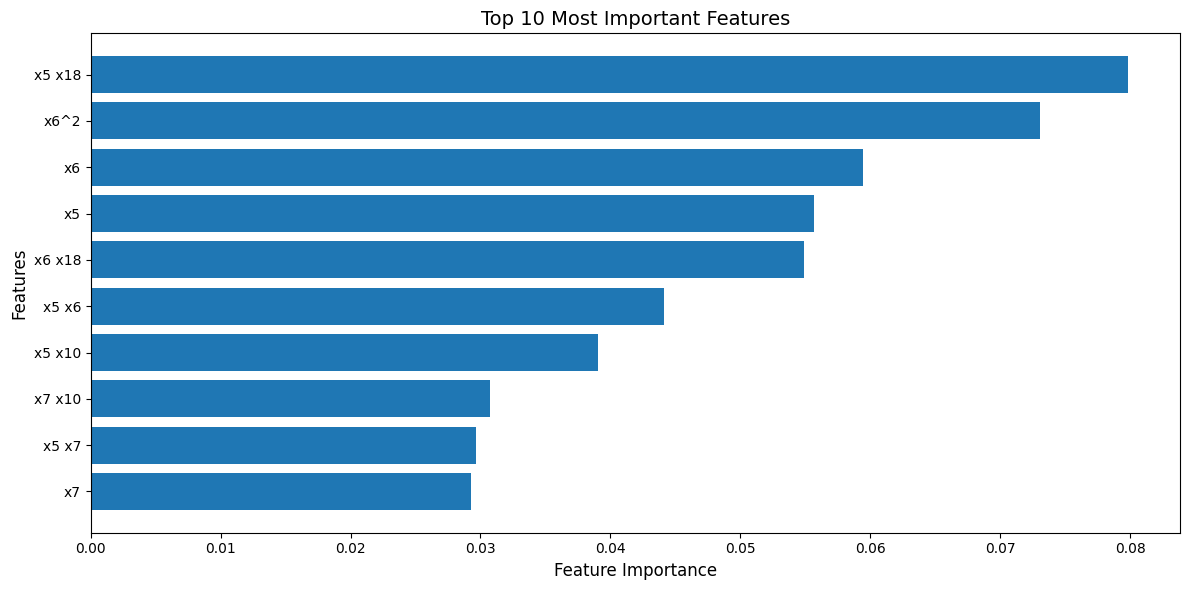

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get transformed feature names (after PolynomialFeatures)
feature_engineering = best_model.named_steps['feature_engineering']
feature_selection = best_model.named_steps['feature_selection']
selected_feature_names = feature_selection.get_feature_names_out()
poly_feature_names = feature_engineering.get_feature_names_out(selected_feature_names)

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
n_features_to_plot = min(10, len(feature_importances))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(np.array(poly_feature_names)[sorted_idx[:n_features_to_plot]], 
         feature_importances[sorted_idx[:n_features_to_plot]])

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title(f"Top {n_features_to_plot} Most Important Features", fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()

# **Fix label display**
plt.tight_layout()  # Adjust layout
plt.show()


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(5, 50),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Best Parameters: {'classifier__max_depth': 48, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 326}
Best CV Accuracy: 0.9260416666666667


In [44]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

for name, model in models.items():
    pipeline.set_params(classifier=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Model: RandomForest
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.95      0.97      0.96       184
           2       0.95      0.74      0.83        27

    accuracy                           0.94       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.94      0.94      0.94       240



c:\Users\user\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.93      0.95      0.94       184
           2       0.95      0.70      0.81        27

    accuracy                           0.90       240
   macro avg       0.87      0.82      0.83       240
weighted avg       0.91      0.90      0.90       240

Model: CatBoost
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.94      0.96      0.95       184
           2       0.95      0.70      0.81        27

    accuracy                           0.92       240
   macro avg       0.89      0.83      0.85       240
weighted avg       0.92      0.92      0.92       240

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report

def tune_hyperparameters(pipeline, X_train, y_train, n_iter=30, cv=5):
    """Performs hyperparameter tuning using RandomizedSearchCV."""
    param_dist = {
        'classifier__n_estimators': randint(100, 500),
        'classifier__max_depth': randint(5, 50),
        'classifier__min_samples_split': randint(2, 20),
        'classifier__min_samples_leaf': randint(1, 10),
        'classifier__max_features': ['sqrt', 'log2', None]
    }

    random_search = RandomizedSearchCV(
        pipeline, param_distributions=param_dist, n_iter=n_iter,
        cv=cv, scoring='accuracy', n_jobs=-1, random_state=42
    )
    random_search.fit(X_train, y_train)
    print("Best Parameters:", random_search.best_params_)
    print("Best CV Accuracy:", random_search.best_score_)
    return random_search.best_estimator_

def evaluate_models(models, pipeline, X_train, X_test, y_train, y_test):
    """Fits different models using the given pipeline and evaluates their performance."""
    results = {}
    for name, model in models.items():
        pipeline.set_params(classifier=model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        results[name] = classification_report(y_test, y_pred, output_dict=True)
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))
    return results

# Define models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Define the optimized pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [47]:
def evaluate_models(models, pipeline, X_train, X_test, y_train, y_test):
    """Fits different models using the given pipeline and evaluates their performance."""
    results = {}
    for name, model in models.items():
        pipeline.set_params(classifier=model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        weighted_avg = report.get("weighted avg", {})

        results[name] = {
            "accuracy": report.get("accuracy", 0),  # Accuracy is a float, not a dict
            "precision": weighted_avg.get("precision", 0),
            "recall": weighted_avg.get("recall", 0),
            "f1-score": weighted_avg.get("f1-score", 0)
        }
        
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))
    
    return results


In [48]:
def plot_model_performance(results):
    """Plots the classification performance metrics for different models."""
    metrics = ['accuracy', 'precision', 'recall', 'f1-score']
    model_names = list(results.keys())
    
    # Extract only the necessary values
    scores = {metric: [results[model][metric] for model in model_names] for metric in metrics}
    
    df = pd.DataFrame(scores, index=model_names)

    plt.figure(figsize=(10, 6))
    df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(title="Metric")
    plt.show()


Model: RandomForest
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.95      0.99      0.97       184
           2       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240

Model: XGBoost
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.94      0.98      0.96       184
           2       1.00      0.70      0.83        27

    accuracy                           0.94       240
   macro avg       0.95      0.86      0.90       240
weighted avg       0.94      0.94      0.94       240

Model: CatBoost
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.94      0.98      0.96       184
           2       0.95 

<Figure size 1000x600 with 0 Axes>

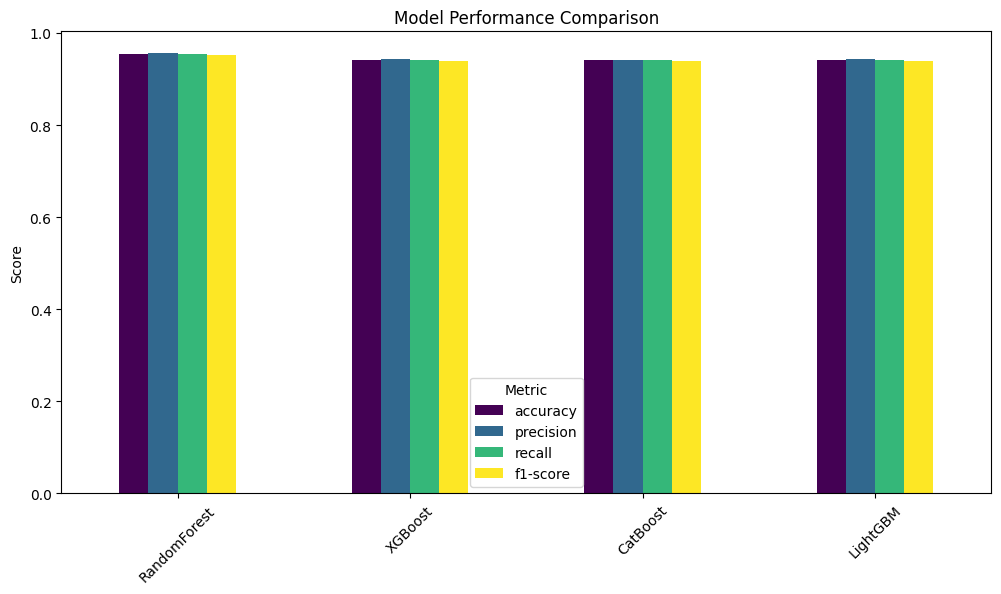

In [49]:
results = evaluate_models(models, pipeline, X_train, X_test, y_train, y_test)
plot_model_performance(results)


In [50]:
models["XGBoost"] = XGBClassifier(eval_metric='mlogloss', random_state=42)
models["LightGBM"] = LGBMClassifier(min_data_in_leaf=10, random_state=42)


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 13
[LightGBM] [Info] Start training from score -1.760988
[LightGBM] [Info] Start training from score -0.330242
[LightGBM] [Info] Start training from score -2.212973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Figure size 1000x600 with 0 Axes>

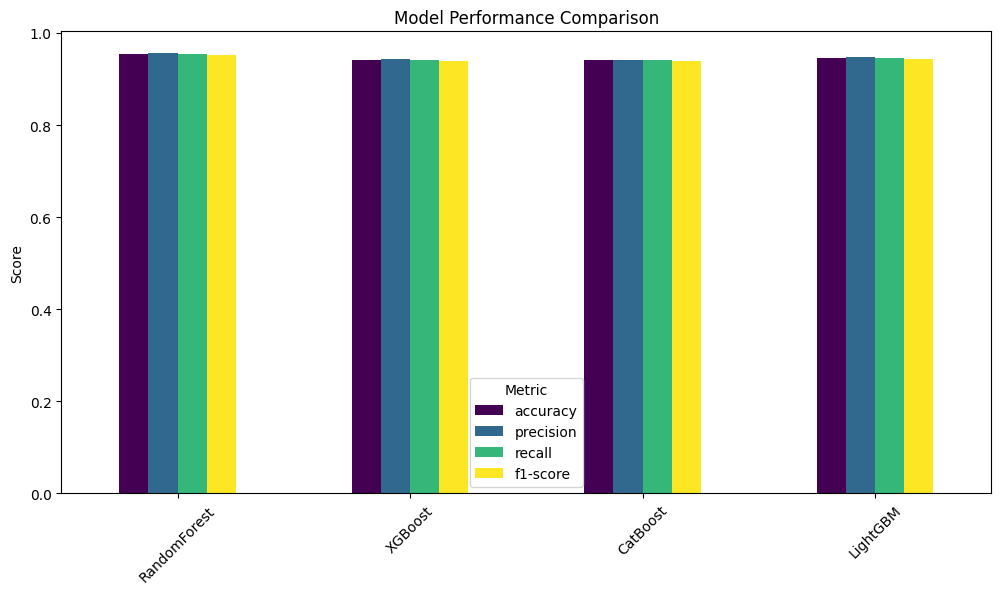

In [51]:
# Tune hyperparameters
best_pipeline = tune_hyperparameters(pipeline, X_train, y_train)

# Evaluate models
results = evaluate_models(models, best_pipeline, X_train, X_test, y_train, y_test)

# Visualize performance
plot_model_performance(results)


In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define base estimators with tuned hyperparameters (adjust as needed)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=269, max_depth=11, 
                                   max_features=None, min_samples_leaf=3, 
                                   min_samples_split=3, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Create the StackingClassifier with Logistic Regression as the final estimator.
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,
    n_jobs=-1
)

# Train and evaluate the stacking ensemble.
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

print("Stacking Ensemble Performance:")
print(classification_report(y_test, y_pred_stacking))


Stacking Ensemble Performance:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.95      0.98      0.97       184
           2       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.95      0.89      0.91       240
weighted avg       0.95      0.95      0.95       240



In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Define base estimators (using same tuned models as above)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=269, max_depth=11, 
                                   max_features=None, min_samples_leaf=3, 
                                   min_samples_split=3, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Create the VotingClassifier with soft voting.
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft',  # 'soft' voting averages probabilities
    n_jobs=-1
)

# Train and evaluate the voting ensemble.
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Voting Ensemble Performance:")
print(classification_report(y_test, y_pred_voting))


Voting Ensemble Performance:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.95      0.98      0.97       184
           2       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.95      0.89      0.91       240
weighted avg       0.95      0.95      0.95       240



In [54]:
import numpy as np
from sklearn.metrics import classification_report

def blend_ensemble(models, X, weights):
    """
    models: list of trained models that implement predict_proba
    weights: list of weights (should sum to 1)
    Returns the blended class predictions.
    """
    # Initialize an array for blended probabilities
    blended_prob = None
    for model, weight in zip(models, weights):
        prob = model.predict_proba(X)
        if blended_prob is None:
            blended_prob = weight * prob
        else:
            blended_prob += weight * prob
    # Choose the class with the highest probability for each sample
    return np.argmax(blended_prob, axis=1)

# Assume you have individually tuned and trained models:
rf_model = RandomForestClassifier(n_estimators=269, max_depth=11, 
                                  max_features=None, min_samples_leaf=3, 
                                  min_samples_split=3, random_state=42).fit(X_train, y_train)
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42).fit(X_train, y_train)
cat_model = CatBoostClassifier(verbose=0, random_state=42).fit(X_train, y_train)
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)

# List of models and equal weights for blending
models_list = [rf_model, xgb_model, cat_model, lgbm_model]
weights = [0.25, 0.25, 0.25, 0.25]

# Compute blended predictions
y_pred_blend = blend_ensemble(models_list, X_test, weights)

print("Blended Ensemble Performance:")
print(classification_report(y_test, y_pred_blend))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 40
[LightGBM] [Info] Start training from score -1.760988
[LightGBM] [Info] Start training from score -0.330242
[LightGBM] [Info] Start training from score -2.212973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

Even though overall accuracy is high, taking a closer look at where the model is making mistakes—especially for the class (PerformanceRating 2) that has lower recall.

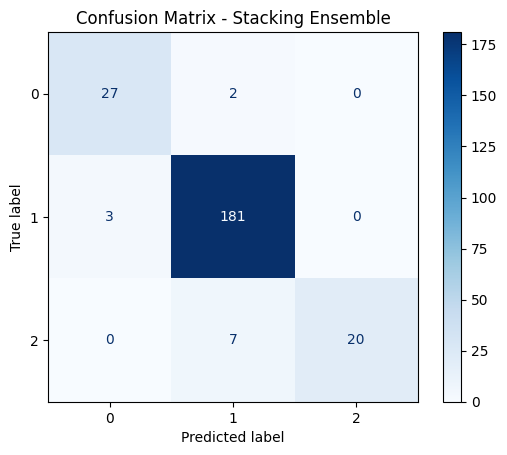

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix for one of your ensemble models (e.g., stacking ensemble)
cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacking Ensemble")
plt.show()


In [60]:
print("Model's expected features:", rf_model.n_features_in_)
print("X_train_numeric features:", X_train_numeric.shape[1])

Model's expected features: 45
X_train_numeric features: 44


I’m looking at the model rf_model, which expects 45 features, but X_train_numeric has only 44. This discrepancy might result from removing a feature through selection.

In [65]:
import pandas as pd

# Assume df is your original DataFrame and 'PerformanceRating' is your target
corr_matrix = data_clean.corr()

# Look at absolute correlations with the target
target_corr = corr_matrix['PerformanceRating'].abs()

print(target_corr.sort_values(ascending=False))


PerformanceRating                       1.000000
EmpEnvironmentSatisfaction              0.395173
EmpLastSalaryHikePercent                0.346046
YearsSinceLastPromotion                 0.194442
ExperienceYearsAtThisCompany            0.161570
EmpDepartment                           0.161003
ExperienceYearsInCurrentRole            0.159019
EmpJobRole_Developer                    0.158130
YearsWithCurrManager                    0.149650
EmpWorkLifeBalance                      0.141066
EmpJobLevel                             0.083957
EmpJobRole_Sales Executive              0.082227
TotalWorkExperienceInYears              0.081830
EmpJobRole_Finance Manager              0.062199
DistanceFromHome                        0.053715
OverTime                                0.051684
Age                                     0.049987
EmpJobRole_Laboratory Technician        0.040126
EmpJobRole_Sales Representative         0.036713
EmpHourlyRate                           0.036679
Attrition           

In [66]:
data_clean=data_clean.drop(columns=['Outlier_Flag','EmpJobRole_Technical Lead'])

In [68]:
# Set a threshold for correlation (e.g., 0.13)
threshold = 0.13
selected_features = target_corr[target_corr > threshold].index.tolist()

# Remove the target itself if it's included
if 'PerformanceRating' in selected_features:
    selected_features.remove('PerformanceRating')

print("Selected highly correlated features:", selected_features)


Selected highly correlated features: ['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpJobRole_Developer']


In [70]:
# Ensure X_selected and y have the same number of rows
df_cleaned = data_clean.dropna()  # Drop rows with missing values
X_selected = df_cleaned[selected_features]
y = df_cleaned['PerformanceRating']

# Reset index to align
X_selected = X_selected.reset_index(drop=True)
y = y.reset_index(drop=True)

# Now split
from sklearn.model_selection import train_test_split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("X_train_selected shape:", X_train_selected.shape)
print("y_train shape:", y_train.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)


X_train_selected shape: (894, 9)
y_train shape: (894,)
X_test_selected shape: (224, 9)
y_test shape: (224,)


Below are separate, self-contained code blocks that let you build ensemble pipelines on your newly split dataset (with highly correlated features) without affecting your old models. You can run these blocks independently and, if the new ensemble doesn't perform as desired, you can revert to your previous models.



In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define new base estimators (you can adjust hyperparameters as needed)
stacking_estimators = [
    ('rf', RandomForestClassifier(n_estimators=269, max_depth=11, 
                                    min_samples_leaf=3, min_samples_split=3, 
                                    max_features=None, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,
    n_jobs=-1
)

# Train on the new, selected dataset
stacking_clf.fit(X_train_selected, y_train)
y_pred_stack = stacking_clf.predict(X_test_selected)

print("Stacking Ensemble Performance on Selected Features:")
print(classification_report(y_test, y_pred_stack))


Stacking Ensemble Performance on Selected Features:
              precision    recall  f1-score   support

           2       0.80      0.89      0.84        36
           3       0.96      0.93      0.94       167
           4       0.73      0.76      0.74        21

    accuracy                           0.91       224
   macro avg       0.83      0.86      0.84       224
weighted avg       0.91      0.91      0.91       224



In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Define the same base estimators as in stacking
voting_estimators = [
    ('rf', RandomForestClassifier(n_estimators=269, max_depth=11, 
                                    min_samples_leaf=3, min_samples_split=3, 
                                    max_features=None, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Create the VotingClassifier (soft voting averages the predicted probabilities)
voting_clf = VotingClassifier(
    estimators=voting_estimators,
    voting='soft',
    n_jobs=-1
)

# Train and evaluate the voting ensemble
voting_clf.fit(X_train_selected, y_train)
y_pred_vote = voting_clf.predict(X_test_selected)

print("Voting Ensemble Performance on Selected Features:")
print(classification_report(y_test, y_pred_vote))


Voting Ensemble Performance on Selected Features:
              precision    recall  f1-score   support

           2       0.74      0.89      0.81        36
           3       0.96      0.90      0.93       167
           4       0.67      0.76      0.71        21

    accuracy                           0.88       224
   macro avg       0.79      0.85      0.82       224
weighted avg       0.89      0.88      0.89       224



Department-wise Performance Summary:
   EmpDepartment  PerformanceRating  Attrition  EmpEnvironmentSatisfaction
0              0           3.052632        0.0                    2.894737
1              1           3.087379        0.0                    2.686084
2              2           2.791667        0.0                    2.854167
3              3           2.941176        0.0                    2.627451
4              4           2.913174        0.0                    2.763473
5              5           2.862745        0.0                    2.661064


C:\Users\user\AppData\Local\Temp\ipykernel_8396\1326685227.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_summary, x='EmpDepartment', y='PerformanceRating', palette='viridis')


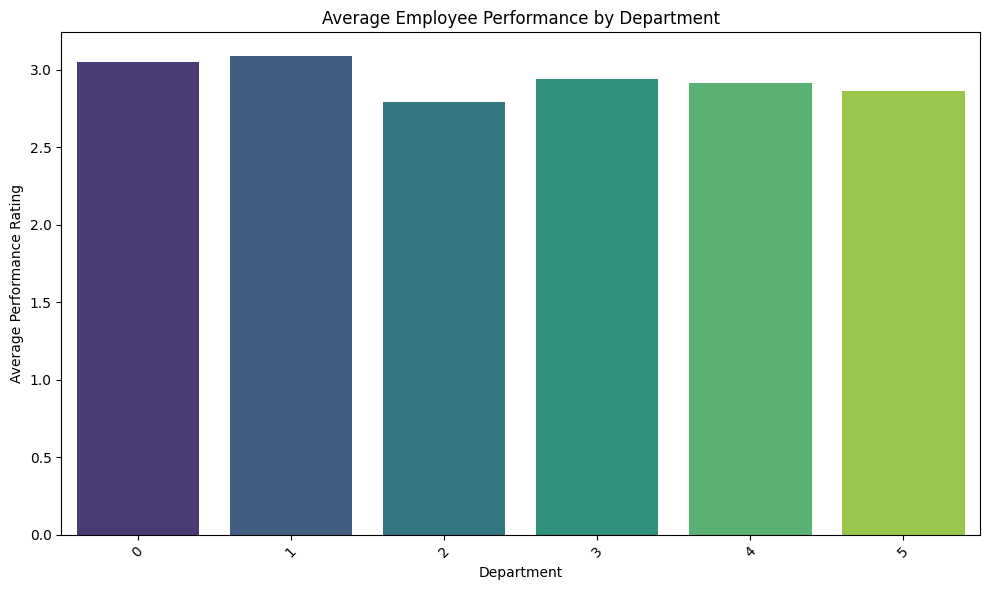

In [74]:
# Assuming 'EmpDepartment' is a column in your original data_clean dataset
dept_summary = data_clean.groupby('EmpDepartment').agg({
    'PerformanceRating': 'mean',
    'Attrition': lambda x: (x=='Yes').mean(),  # or another indicator of turnover
    'EmpEnvironmentSatisfaction': 'mean'
}).reset_index()

print("Department-wise Performance Summary:")
print(dept_summary)

# Visualize the average performance rating by department
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=dept_summary, x='EmpDepartment', y='PerformanceRating', palette='viridis')
plt.title("Average Employee Performance by Department")
plt.xlabel("Department")
plt.ylabel("Average Performance Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[5=Sales, 3=Human Resources, 1=Development, 0=Data Science, 4=Research & Development, 2=Finance]


In [77]:
import pandas as pd

# Extract the RandomForest model from the voting ensemble
rf_model_final = best_old_model.named_estimators_['rf']

# Extract feature importances
feature_importances = rf_model_final.feature_importances_

# Ensure feature names are correctly aligned with the trained model
if hasattr(best_old_model, 'named_steps'):
    preprocessor = best_old_model.named_steps['preprocessor']  # Example if using a pipeline
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_train_selected.columns  # Ensure this is the same data used for training

# Check if the lengths match
print(f"Length of feature_importances: {len(feature_importances)}")
print(f"Length of feature_names: {len(feature_names)}")

# Ensure they match before creating a DataFrame
if len(feature_importances) == len(feature_names):
    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 3 Important Features:")
    print(fi_df.head(3))
else:
    print("Mismatch detected! Check preprocessing steps.")


Length of feature_importances: 9
Length of feature_names: 9

Top 3 Important Features:
                      Feature  Importance
2    EmpLastSalaryHikePercent    0.269150
1  EmpEnvironmentSatisfaction    0.256426
6     YearsSinceLastPromotion    0.214458


2. Top 3 Important Factors Affecting Employee Performance
From the feature importance results:

EmpLastSalaryHikePercent (26.9%) – Salary hikes significantly influence performance.
EmpEnvironmentSatisfaction (25.6%) – Work environment satisfaction is crucial.
YearsSinceLastPromotion (21.4%) – Employees with recent promotions tend to perform better.
Recommendation Based on Insights
Increase Salary Hikes for High Performers: Regular performance-based salary increments can boost motivation.
Improve Work Environment Satisfaction: Conduct employee feedback surveys and improve workplace conditions.
Encourage Career Growth: Reduce the gap between promotions by offering upskilling programs and leadership training.

In [79]:
import joblib

# Save the model
joblib.dump(best_old_model, "final_employee_performance_model.pkl")

print("Best model saved successfully!")


Best model saved successfully!
